In [1]:
# 基本となるモジュール
import os
import time
import datetime
import warnings
warnings.simplefilter("ignore")
# 

# 数学・統計モジュール
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tools.eval_measures as smte

# データ操作・フォーマット
import xarray as xr
from netCDF4 import num2date
from netCDF4 import Dataset as NetCDFFile

# 描画・ビジュアル関連
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mc
from matplotlib.colors import rgb2hex
from matplotlib.colors import Normalize
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator, FuncFormatter
import matplotlib.path as mpath

from cmocean import cm as cmo

# 地図関連
import cartopy as cart
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as feature
#from mpl_toolkits.basemap import Basemap

# その他のモジュール・ツール
import paramiko
from gtool3 import gtopen
from cdo import *
cdo = Cdo()

# 自作モジュール
from read_gtool import read_gtool
gt = read_gtool()
from read_netcdf import *
from command import command as cmd
from set_colormaps import get_color_code, Color_Set
from calc_dex import calc_dex
# Jupyter Notebookの設定
#%matplotlib ipympl
%matplotlib inline

# 描画設定
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.family': 'sans-serif', 'text.usetex': False})

In [2]:
model_name1 = "ECHAM6_wiso"
model_name2 = "MIROC5-iso"
model_name=model_name2

import sys
sys.path.append("/data44/kanon/LGM_ensemble")
import exp_list
df_exp = exp_list.read_exp_name(model_name, model_name1=model_name1, model_name2=model_name2)


expname_PI, expname_LGM, expname_LGM4, expname_LGM2, expname_LGM3 = df_exp.columns.tolist()
exp_label_PI, exp_label_LGM, exp_label_LGM4, exp_label_LGM2, exp_label_LGM3= df_exp.T["label"].tolist()

In [3]:
exp_label_PI="PI"

In [4]:
class draw_map:
    def label_h(self,fig,ax,barplot,cs,levels,label,fontsize):
        cbaCorrax = fig.add_axes(barplot)
        cbar      = plt.colorbar(cs, cax=cbaCorrax,orientation='horizontal',ticks=levels, format=FuncFormatter(format_func)) 
        cbar.ax.tick_params(labelsize=fontsize) 
        cbar.set_label(label, size=fontsize)
        return cbar
    def label_v(self,fig,ax,barplot,cs,levels,label,fontsize):
        cbaCorrax = fig.add_axes(barplot)
        cbar      = plt.colorbar(cs, cax=cbaCorrax,orientation='vertical',ticks=levels, format=FuncFormatter(format_func))
        cbar.ax.tick_params(labelsize=fontsize) 
        cbar.set_label(label, size=fontsize)
        return cbar

In [5]:
csv_filename='./Antarctica_LGM_Proxies.csv'
df_reconst = pd.read_csv(csv_filename,index_col=0)

## Data

### PI

In [6]:
inputdir=f"model_outputs/{expname_PI}/clm/ann/"

gt.dim = "xy"
gt.extrapolate=True
gt.var = inputdir+"T2"
T2_PI = gt.gtopen() -273.15
gt.var = inputdir+"prcp_d18O"
prcp_d18O_PI = gt.gtopen()

gt.var = inputdir+"prcp_d18Oa"
prcp_d18Oa_PI = gt.gtopen()
gt.var = inputdir+"prcp"
prcp_PI = gt.gtopen()*24*60*60
gt.var = inputdir+"gricr"
gricr_PI = gt.gtopen()
gt.var = inputdir+"grsst"
grsst_PI = gt.gtopen()

gt.var = inputdir+"precwtot"
precw_PI = gt.gtopen()
gt.var = inputdir+"u250"
u250_PI= gt.gtopen()
gt.var = inputdir+"slp"
slp_PI = gt.gtopen()

dlon, dlat, dlev = gt.get_gtool_xyzaxis() # get axes


### LGM_G

In [7]:
inputdir=f"model_outputs/{expname_LGM}/clm/ann/"

gt.dim = "xy"
gt.extrapolate=True
gt.var = inputdir+"T2"
T2_LGM = gt.gtopen() -273.15
gt.var = inputdir+"prcp_d18O"
prcp_d18O_LGM = gt.gtopen()

gt.var = inputdir+"prcp_d18Oa"
prcp_d18Oa_LGM = gt.gtopen()
gt.var = inputdir+"prcp"
prcp_LGM = gt.gtopen()*24*60*60
gt.var = inputdir+"gricr"
gricr_LGM = gt.gtopen()
gt.var = inputdir+"grsst"
grsst_LGM = gt.gtopen()

gt.var = inputdir+"precwtot"
precw_LGM = gt.gtopen()
gt.var = inputdir+"u250"
u250_LGM= gt.gtopen()
gt.var = inputdir+"slp"
slp_LGM = gt.gtopen()

egr_LGM =read_netCDF_data(f'{inputdir}/egr850.nc').squeeze()

### LGM_M

In [8]:
inputdir=f"model_outputs/{expname_LGM2}/clm/ann/"

gt.dim = "xy"
gt.extrapolate=True
gt.var = inputdir+"T2"
T2_LGM2 = gt.gtopen() -273.15
gt.var = inputdir+"prcp_d18O"
prcp_d18O_LGM2 = gt.gtopen()

gt.var = inputdir+"prcp_d18Oa"
prcp_d18Oa_LGM2 = gt.gtopen()
gt.var = inputdir+"prcp"
prcp_LGM2 = gt.gtopen()*24*60*60
gt.var = inputdir+"gricr"
gricr_LGM2 = gt.gtopen()
gt.var = inputdir+"grsst"
grsst_LGM2 = gt.gtopen()

gt.var = inputdir+"precwtot"
precw_LGM2 = gt.gtopen()
gt.var = inputdir+"u250"
u250_LGM2= gt.gtopen()
gt.var = inputdir+"slp"
slp_LGM2 = gt.gtopen()

### LGM_Mw/Gice

In [9]:
inputdir=f"model_outputs/{expname_LGM3}/clm/ann/"

gt.dim = "xy"
gt.extrapolate=True
gt.var = inputdir+"T2"
T2_LGM3 = gt.gtopen() -273.15
gt.var = inputdir+"prcp_d18O"
prcp_d18O_LGM3 = gt.gtopen()

gt.var = inputdir+"prcp_d18Oa"
prcp_d18Oa_LGM3 = gt.gtopen()
gt.var = inputdir+"prcp"
prcp_LGM3 = gt.gtopen()*24*60*60
gt.var = inputdir+"gricr"
gricr_LGM3 = gt.gtopen()
gt.var = inputdir+"grsst"
grsst_LGM3 = gt.gtopen()

gt.var = inputdir+"precwtot"
precw_LGM3 = gt.gtopen()
gt.var = inputdir+"u250"
u250_LGM3= gt.gtopen()
gt.var = inputdir+"slp"
slp_LGM3 = gt.gtopen()

egr_LGM3 =read_netCDF_data(f'{inputdir}/egr850.nc').squeeze()

In [10]:
def reshape(egr):
    egr_reshaped=np.zeros_like(prcp_LGM)
    egr_reshaped[1:-1,:] = egr
    egr_reshaped[0,:] = np.nanmean(egr[0,:])
    egr_reshaped[-1,:] = np.nanmean(egr[-1,:])
    return egr_reshaped

In [11]:
egr_LGM=reshape(egr_LGM)
egr_LGM3=reshape(egr_LGM3)

In [12]:
egr_LGM2 = egr_LGM3

In [13]:
gt.dim = "xy"
gt.extrapolate=True
gt.var = "grlndfglac1d.t42"
grlndf_LGM = gt.gtopen()
#grlndf_LGM[grlndf_LGM<=0.01] = np.nan

## Sea Surface Temperature

In [14]:
ssta_levels = [-6,-5,-4,-3,-2,-1,-0.5,0.5,1,2,3,4,5,6]
ssta_cmapname        = "RdBu_r"
ssta_cmap, ssta_norm = Color_Set(ssta_levels, ssta_cmapname)
ssta_label = "Sea Surface Temperature Anomaly"
ssta_unit = "[$\mathrm{^\circ C}$]" 

In [15]:
grsst_PI[grlndf_LGM>=1] = np.nan
grsst_LGM[grlndf_LGM>=1] = np.nan
grsst_LGM2[grlndf_LGM>=1] = np.nan
grsst_LGM3[grlndf_LGM>=1] = np.nan

## Sea Ice

In [16]:
ice_levels = [0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
ice_cmapname = "Blues_r"
ice_cmap, ice_norm = Color_Set(ice_levels, ice_cmapname)
ice_label = "Sea Ice Concentration"
ice_unit = "[-]" 

In [17]:
gricr_PI[grlndf_LGM>=1] = np.nan
gricr_LGM[grlndf_LGM>=1] = np.nan
gricr_LGM2[grlndf_LGM>=1] = np.nan
gricr_LGM3[grlndf_LGM>=1] = np.nan

In [18]:
grsst_LGM_zonalmean = np.nanmean(grsst_LGM,1)
grsst_LGM2_zonalmean = np.nanmean(grsst_LGM2,1)
grsst_LGM3_zonalmean = np.nanmean(grsst_LGM3,1)
grsst_PI_zonalmean = np.nanmean(grsst_PI,1)

In [19]:
gricr_LGM_zonalmean = np.nanmean(gricr_LGM,1)
gricr_LGM2_zonalmean = np.nanmean(gricr_LGM2,1)
gricr_LGM3_zonalmean = np.nanmean(gricr_LGM3,1)
gricr_PI_zonalmean = np.nanmean(gricr_PI,1)

In [20]:
import numpy as np
import pandas as pd

def calculate_gradient(sst, dlat, dlon, icr):
    """
    Calculates the gradient of sea surface temperature (SST).
    :param sst: Sea Surface Temperature array
    :param dlat: Latitude differences array
    :param dlon: Longitude array
    :param icr: Ice cover ratio array
    :return: Gradient array with NaNs where conditions are not met
    """
    # Calculate SST gradient
    delta_sst = np.zeros(sst.shape)
    delta_sst[1:, :] = sst[:-1, :] - sst[1:, :]
    delta_sst[0, :] = 0

    # Calculate latitudinal differences
    delta_lat = np.zeros(sst.shape)
    delta_lat[1:, 0] = dlat[:-1] - dlat[1:]
    delta_lat[0, 0] = 0
    for ii in range(len(dlon)):
        delta_lat[:, ii] = delta_lat[:, 0]

    # Calculate the gradient
    grad = delta_sst / delta_lat

    # Apply ice cover ratio and minimum gradient conditions
    grad[(icr > 0.15)] = np.nan
    grad[grlndf_LGM>=1] = np.nan
    return grad

def get_front(grad, dlat, dlon):
    """
    Identifies the position of the front within specified latitude limits.
    :param grad: Gradient array
    :param dlat: Latitude array
    :param dlon: Longitude array
    :return: DataFrame with the positions of the front
    """
    df_front = pd.DataFrame(columns=["lon", "lat"])

    # Restrict to the range between 20S and 70S
    lat_range_mask = (dlat >= -70) & (dlat <= -20)
    grad[~lat_range_mask, :] = np.nan

    for i in range(len(dlon)):
        if not np.all(np.isnan(grad[:, i])):
            idx = np.nanargmax(grad[:, i])
            new_row = {"lon": dlon[i], "lat": dlat[idx]}                    
            df_front = pd.concat([df_front, pd.DataFrame([new_row])], ignore_index=True)

    return df_front


In [21]:
grad_PI = calculate_gradient(grsst_PI, dlat, dlon, gricr_PI)
grad_LGM = calculate_gradient(grsst_LGM, dlat, dlon, gricr_LGM)
grad_LGM2 = calculate_gradient(grsst_LGM2, dlat, dlon, gricr_LGM2)
grad_LGM3 = calculate_gradient(grsst_LGM3, dlat, dlon, gricr_LGM3)

In [22]:
grad_PI_zonalmean = np.nanmean(grad_PI[:,:-1],1)
grad_LGM_zonalmean = np.nanmean(grad_LGM[:,:-1],1)
grad_LGM2_zonalmean = np.nanmean(grad_LGM2[:,:-1],1)
grad_LGM3_zonalmean = np.nanmean(grad_LGM3[:,:-1],1)

In [23]:
front_PI = get_front(grad_PI, dlat, dlon)
front_LGM = get_front(grad_LGM, dlat, dlon)
front_LGM2 = get_front(grad_LGM2, dlat, dlon)
front_LGM3 = get_front(grad_LGM3, dlat, dlon)

In [24]:
num_grids=np.ones_like(grlndf_LGM, dtype=bool)
num_grids[grlndf_LGM<0.1] = False
num_grids[dlat>-60,:]=False

In [25]:
slp_LGM2[num_grids] = np.nan
slp_LGM3[num_grids] = np.nan

## Spatial Distributions

In [26]:
tempa_levels = [-6,-4,-3,-2,-1.5,-1,-0.5,0.5,1,1.5,2,3,4,6]
tempa_cmapname = "seismic"
tempa_cmap, tempa_norm = Color_Set(tempa_levels, tempa_cmapname)
tempa_label="$\mathsf{\Delta T}$"
tempa_unit = "[$\mathrm{^\circ C}$]" 
T2a_label = "Surface Air Temperature Anomaly "+tempa_unit

tempa2_levels = [-18, -15, -12, -10, -8]
tempa2_cmapname = "terrain_r"
tempa2_cmap, tempa2_norm = Color_Set(tempa2_levels, tempa2_cmapname)

color_code           = (get_color_code(tempa_cmapname,len(tempa_levels)+1)[:]) # Modification
color_code2           = (get_color_code(tempa2_cmapname,len(tempa2_levels)+1)[:]) # Modification

tempa3_levels=np.concatenate([tempa2_levels,tempa_levels])
tempa3_cmap, tempa3_norm = mc.from_levels_and_colors(tempa3_levels,np.concatenate([color_code2,color_code])[1:],extend="both")     

In [27]:
tempa5_levels = [-6,-5, -4, -3, -2, -1,  -0.5, 0.5,  1,  2,  3,  4,  5,6]
tempa5_cmapname = "seismic"
tempa5_cmap, tempa5_norm = Color_Set(tempa5_levels, tempa5_cmapname)

color_code           = (get_color_code("seismic",len(tempa5_levels)+1)[:]) # Modification

color_code[len(color_code)-1] = color_code[len(color_code)-2]
tempa5_cmap, tempa5_norm = mc.from_levels_and_colors(tempa5_levels,color_code,extend="both")   
T2_unit = "[$\mathrm{^\circ C}$]" 

In [28]:
d18O_levels =  np.arange(-12,0,1)
d18O_cmap, d18O_norm =Color_Set(d18O_levels, "cubehelix")
d18O_unit="[\u2030]"
d18Ow_label="$\mathsf{\Delta\delta^{18}O_{p}}$"
d18O_unit = "[\u2030]" 
d18Oa_label = " $\mathrm{\Delta\delta^{18}O_{a}}$"

In [29]:
#prcpr_levels = [10,20,30,40,50,60,70,80,90,100,150,200,300,400,500,600,700,800,1000]
prcpr_levels = [10,20,30,40,50,60,70,80,90,100]
prcpr_cmapname = "copper"
prcpr_cmap, prcpr_norm = Color_Set(prcpr_levels, prcpr_cmapname)
prcpr_label = "$\Delta P$"
prcpr_unit = "[%]" 

color_code           = (get_color_code(prcpr_cmapname,len(prcpr_levels)+1)[:])
prcpr_cmap, prcpr_norm = mc.from_levels_and_colors(prcpr_levels[:len(prcpr_levels)],color_code[:len(prcpr_levels)+1][1:],extend="min")     
prcpr_levels=prcpr_levels[:len(prcpr_levels)]

In [30]:
precwr_label = "$\Delta$ Precipitable water"
precwr_unit = "[%]" 

In [31]:
# カラーマップの作成
colors = [ (1, 1, 1, 0),(1,1,1, 1)]  # RGBA
n_bin = 2  # Number of bins
mask_cmapname = "custom1"
mask_cmap = mc.LinearSegmentedColormap.from_list(mask_cmapname, colors, N=n_bin)

# レベルと正規化
mask_levels = [0, 0.5, 1]
mask_norm = mc.BoundaryNorm(mask_levels, mask_cmap.N)

In [32]:
# FuncFormatterの定義
def format_func(x, pos):
    if x % 1 == 0:
        return f'{x:.0f}'  # 小数点以下が0なら整数表示
    else:
        return f'{x:.1g}'  # それ以外は有効数字1桁

levels = np.arange(-5,5.5,0.5)
cmapname = "rainbow"
cmap, norm = Color_Set(levels, cmapname)
class draw_Ant:
    def raw(self,ax,area,title,x,y,var0,norm,cmap,levels,fontsize=24,cont=False, mask=False, levelso=levels,var0o=[], maskfile=grlndf_LGM):
        import cartopy.crs as ccrs
        
        ax.set_boundary(draw_Ant().circle(), transform=ax.transAxes)
        ax.set_title(title, fontsize=fontsize) 
        cm = plt.get_cmap(cmap)
        cs = ax.contourf(x, y, var0, 
                             norm=norm, cmap=cmap, levels=levels, 
                             transform=ccrs.PlateCarree(),extend = "both")
        if cont == True:
            ax.contour(x, y, var0o, 
                       colors="black", levels=levelso, linewidths=0.1, alpha=0.5, transform=ccrs.PlateCarree())
        ax.set_global()
#        ax.coastlines()

        ax.set_extent(area, crs=ccrs.PlateCarree())
        
        if mask == True:
#            ax.add_feature(cart.feature.OCEAN, zorder=100, edgecolor=None)  

            ax.contourf(x,y,maskfile,
                             norm=mask_norm,cmap=mask_cmap,levels=mask_levels,
                             transform=ccrs.PlateCarree(),extend = "both", zorder=100)
        
        ax.set_title(title, loc="center", fontsize=20, weight="demibold")
        
        gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                  draw_labels=False,
                  linewidth=0.5, linestyle='-', color='gray', alpha=1, zorder=200)

        return cs
    
    def circle(self):
        import numpy as np
        import matplotlib.path as mpath
        theta = np.linspace(0, 2*np.pi, 100)
        center, radius = [0.5, 0.5], 0.5
        verts = np.vstack([np.sin(theta), np.cos(theta)]).T
        circle = mpath.Path(verts * radius + center)
        
        return circle 
    
    
    def scatter(self,ax,area,title,x,y,var0,norm,cmap,levels,fontsize=24,linewidths=0.3):
        ax.set_title(title, fontsize=fontsize) 
        
        cm = plt.get_cmap(cmap)
        cs = ax.scatter( x,y, s=100, marker="o", edgecolor="black",linewidths=linewidth, 
                             c=var0, norm=norm, cmap=cmap, 
                             transform=ccrs.PlateCarree())
                
        ax.set_global()
#        ax.coastlines()
        ax.set_extent(area, crs=ccrs.PlateCarree())
        
        return cs
    

In [33]:
levels = [-10,-8,-6,-4,-2,-1,1,2,4,6,8,10]
cmapname = "coolwarm"
cmap, norm = Color_Set(levels, cmapname)
def drawAnt_field3(var1, var2, var3, var1o=[], var2o=[], var3o=[], title1="", title2="",title3="",
                   label="", levels=levels, cmap=cmap, norm=norm, area=[-180, 180, -90, -20], 
                   cont=False, mask=False, levelso=levels, bar=True, fontsize=12, barfontsize=20):
  
    fig, ax = plt.subplots(1, 3, figsize=(15,7),
                                   subplot_kw=dict(projection=ccrs.SouthPolarStereo()))
    
    cs = draw_Ant().raw(ax[0], area, "", dlon, dlat, var1, norm, cmap, levels, fontsize, cont, mask, levelso, var1o)
    ax[0].set_title(f"(a) {title1}", loc="left", fontsize=fontsize, weight="demibold")

    draw_Ant().raw(ax[1], area, "", dlon, dlat, var2, norm, cmap, levels,fontsize, cont, mask, levelso, var2o)
    ax[1].set_title(f"(b) {title1}", loc="left", fontsize=fontsize, weight="demibold")

    draw_Ant().raw(ax[2], area, "", dlon, dlat, var3, norm, cmap, levels,fontsize, cont, mask, levelso, var3o)
    ax[2].set_title(f"(c) {title1}", loc="center", fontsize=fontsize, weight="demibold")
    
    barplot=[0.05, 0.1, 0.9, 0.05]
    if bar == True:
        draw_map().label_h(fig, ax, barplot, cs, levels, label, barfontsize)    
    plt.subplots_adjust(top=1,bottom=0.05,left=0.02,right=0.98,hspace=0.05,wspace=0.05)

    return fig, ax, cs

In [34]:
def draw_proxy(ax, df_in, var="grad", title="", area=[-180, 180, -90, -20],
                label="",levels=levels, cmap=cmap, norm=norm,
                barplot=[0.05, 0.05, 0.9, 0.05],  bar=True, text=True):

#ax.coastlines()
#    ax.add_feature(cart.feature.OCEAN, zorder=100, edgecolor=None)
    cs = draw_Ant().scatter(ax,area,title, df_in["lon"],df_in["lat"],df_in[var],
                            norm,cmap,levels,linewidths=1)  
    
    draw_Ant().scatter(ax,area,title, 
                       df_in["lon"][np.isnan(df_in[var])==True],
                       df_in["lat"][np.isnan(df_in[var])==True],
                       "black", norm,cmap,levels, linewidths=1) 
    
    if var == "grad" or var =="mgrad":
        unit=" \u2030/\u00b0C"
    elif var =="d18O" or var =="dd18O" or var=="md18O" or var=="dex":
        unit="\u2030"
    elif var=="T2" or var=="temp" or var=="dtemp":
        unit ="\u00b0C"
    else:
        unit=""
        
#    maxlen = 6
    
    if text == True:    
        for i in range(len(df_in)):
            
            ax.text(df_reconst["lon"][i],df_reconst["lat"][i]+0.4,df_reconst.index[i], 
                va="bottom", c="black",  fontsize=14, 
            transform=ccrs.PlateCarree(), zorder=700)    
            
    if bar==True:
        draw_map().label_h(fig,ax,barplot, cs,levels,label,32)
    
    return ax,cs

In [35]:
levels = [-10,-8,-6,-4,-2,-1,1,2,4,6,8,10]
cmapname = "coolwarm"
cmap, norm = Color_Set(levels, cmapname)
def drawAnt_field2(var1, var2, 
                   var1o=[], var2o=[], 
                   title1="", title2="",
                   label1="", label2="",
                   levels1=levels, cmap1=cmap, norm1=norm, 
                   levels2=levels, cmap2=cmap, norm2=norm, 
                   area=[-180, 180, -90, -20], 
                   cont1=False, cont2=False,
                   mask1=False, mask2=False,
                   levelso1=levels, levelso2=levels, 
                   bar=True, bar1=False, bar2=False, barfontsize=16):
  
    fig, ax = plt.subplots(1, 2, figsize=(10,6),
                                   subplot_kw=dict(projection=ccrs.SouthPolarStereo()))
    
    cs1 = draw_Ant().raw(ax[0], area, "", dlon, dlat, var1, norm1, cmap1, levels1, 16, cont1, mask2, levelso2, var1o)
    ax[0].set_title(f"{title1}", loc="left", fontsize=16, weight="demibold")

    cs2=draw_Ant().raw(ax[1], area, "", dlon, dlat, var2, norm2, cmap2, levels2, 16, cont2, mask2, levelso2, var2o)
    ax[1].set_title(f"{title2}", loc="left", fontsize=16, weight="demibold")

    if bar == True & (bar1== False & bar2==False):
        barplot=[0.05, 0.1, 0.9, 0.04]
        draw_map().label_h(fig, ax, barplot, cs1, levels1, label1, barfontsize)
    else:
        if bar1 == True:
            barplot=[0.05, 0.1, 0.4, 0.04]
            draw_map().label_h(fig, ax, barplot, cs1, levels1, label1, barfontsize)
        if bar2 == True:
            barplot=[0.55, 0.1, 0.4, 0.04]
            draw_map().label_h(fig, ax, barplot, cs2, levels2, label2, barfontsize)
    plt.subplots_adjust(top=1,bottom=0.05,left=0.02,right=0.98,hspace=0.05,wspace=0.05)

    return fig, ax, cs1, cs2

### $\mathsf{\delta^{18}O_p}$

In [36]:
prcp_d18Oa_levels2=[-20,-15,-12,-10,-8,-6,-4,-2, 0]
prcp_d18Oa_cmapname2 = "Spectral_r"
prcp_d18Oa_cmap2, prcp_d18Oa_norm2 = Color_Set(
    prcp_d18Oa_levels2, prcp_d18Oa_cmapname2)
prcp_d18Oa_label = " $\mathrm{\delta^{18}O_p}$ Anomaly"
prcp_d18Oa_unit = "[\u2030]" 

#### LGM - PI

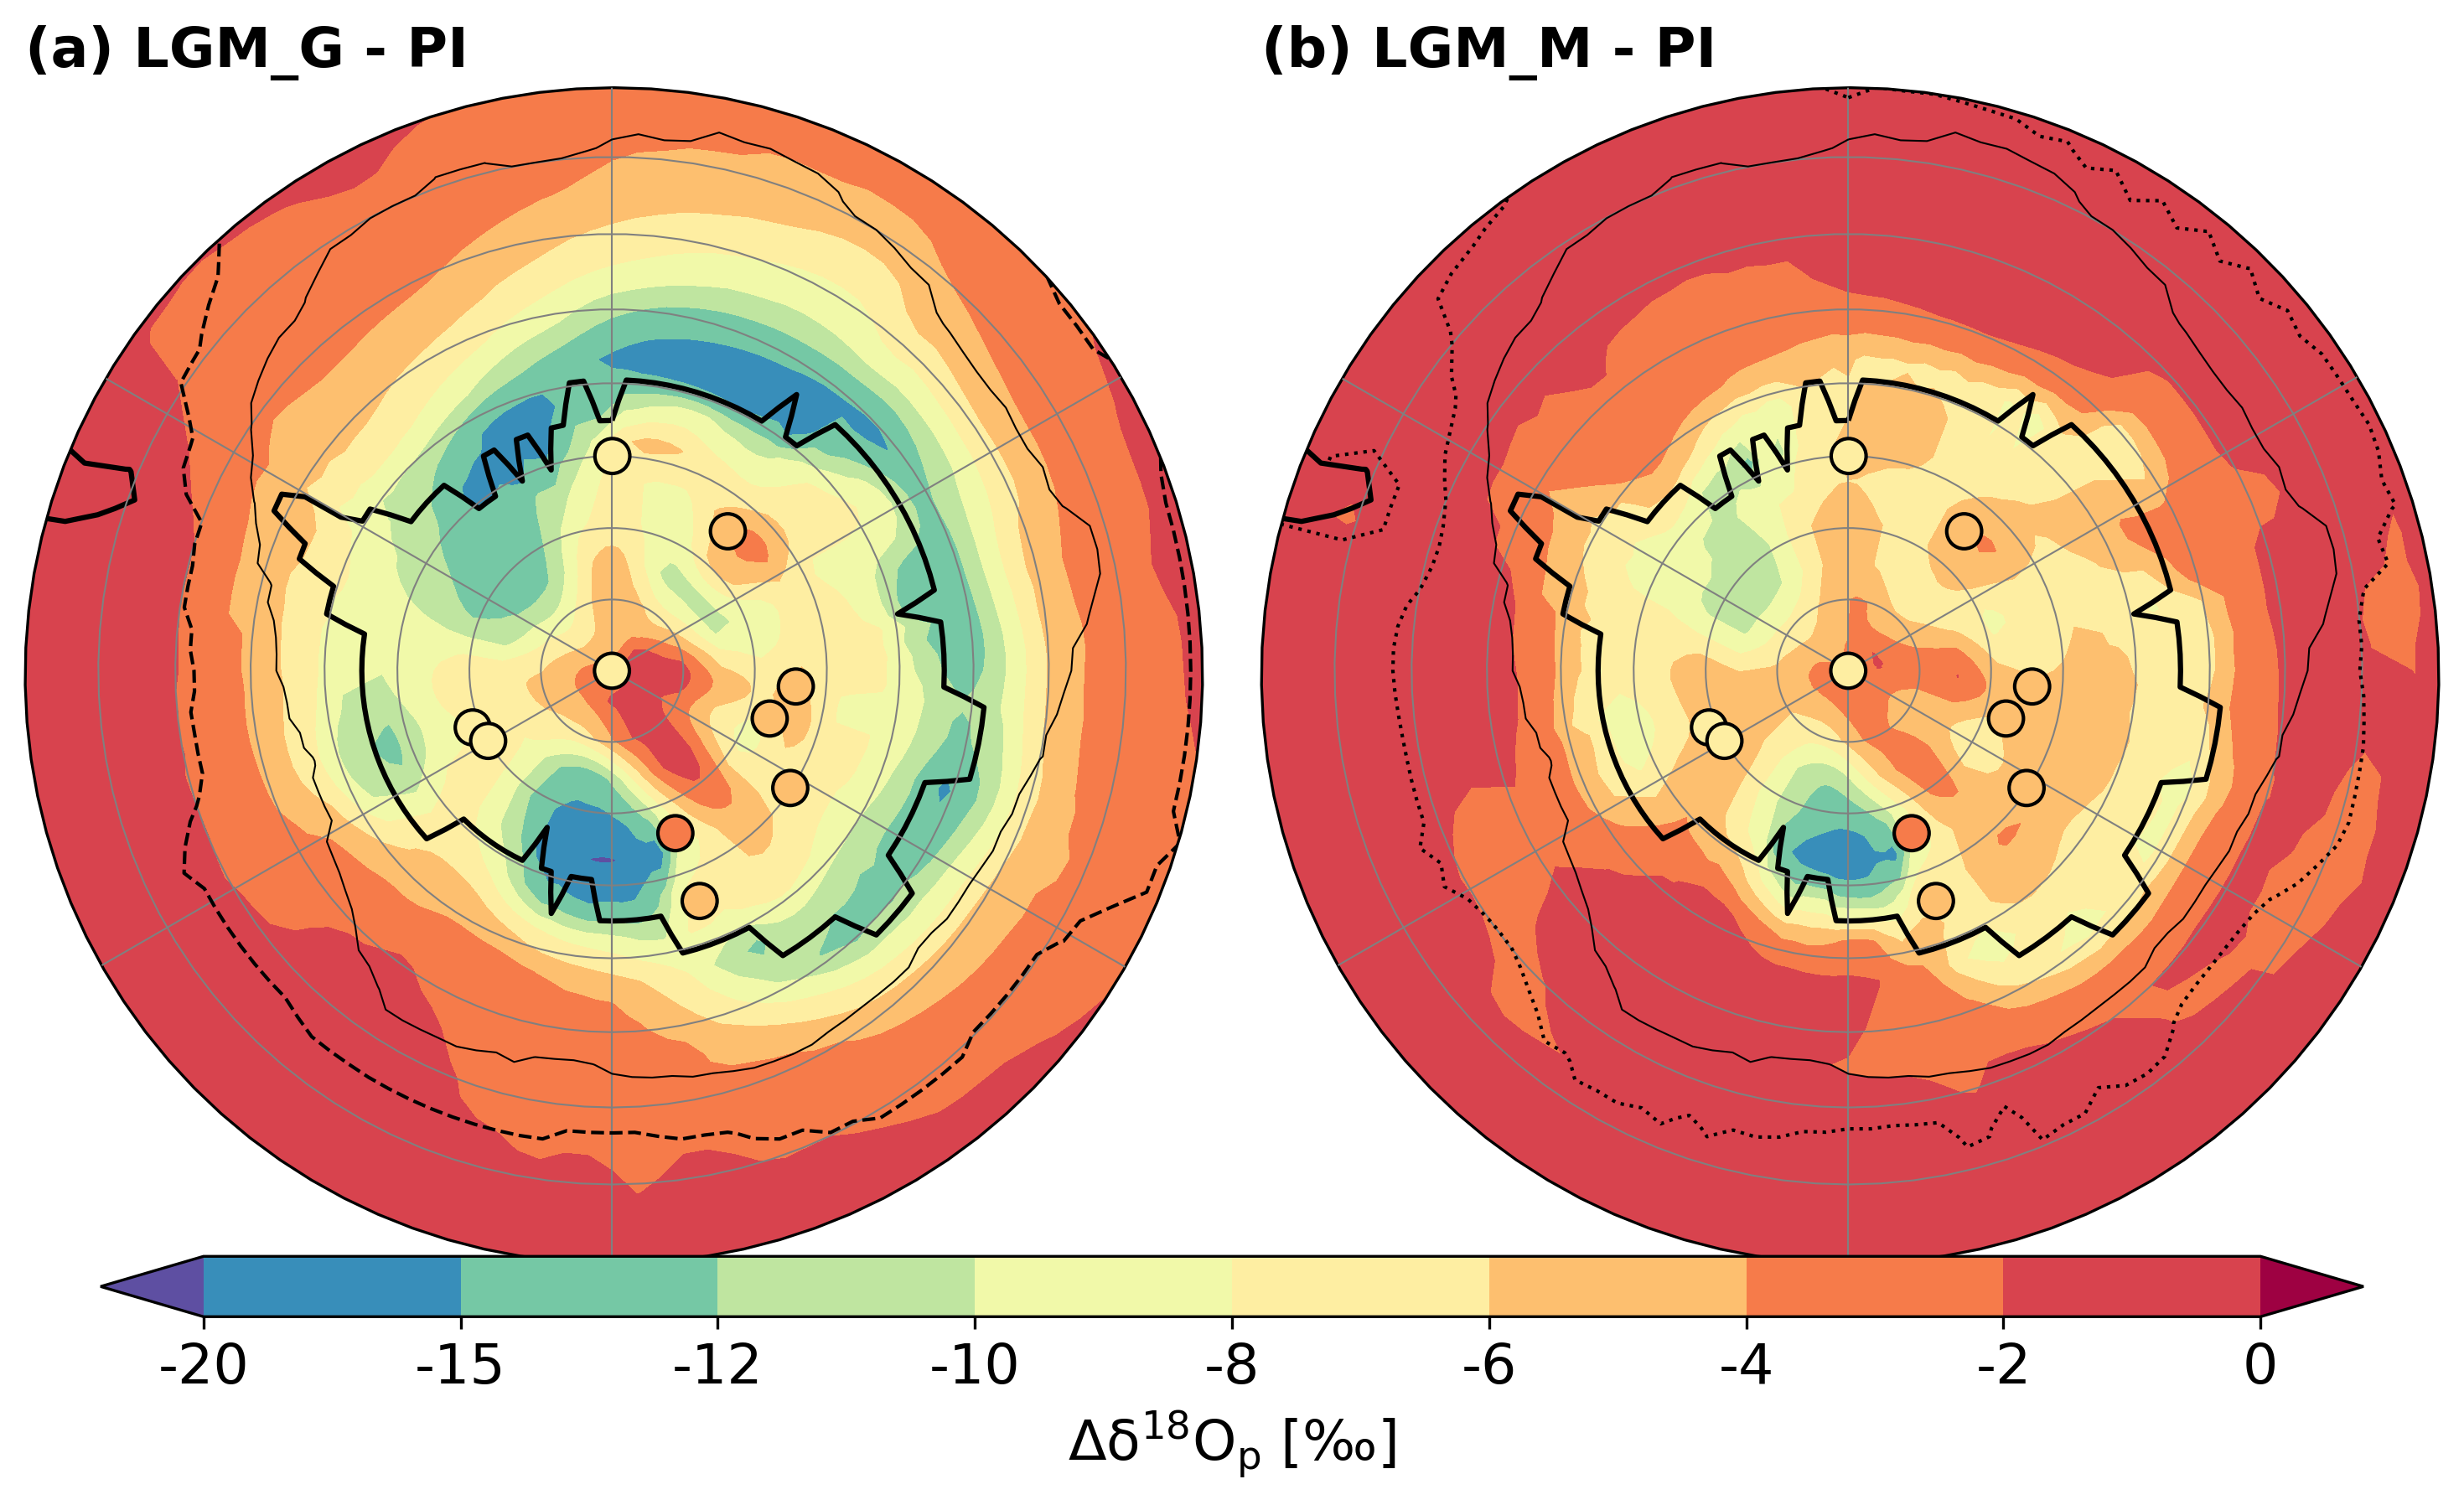

In [37]:
area=[-180,180,-90,-50]
fig,ax,cs1, cs2 = drawAnt_field2(
    prcp_d18O_LGM-prcp_d18O_PI, 
    prcp_d18O_LGM2-prcp_d18O_PI,
    label1=d18Ow_label+" "+d18O_unit,
    title1=f"(a) {exp_label_LGM} - {exp_label_PI}",
    title2=f"(b) {exp_label_LGM2} - {exp_label_PI}",
    levels1= prcp_d18Oa_levels2, cmap1=prcp_d18Oa_cmap2, norm1=prcp_d18Oa_norm2, 
    levels2= prcp_d18Oa_levels2, cmap2=prcp_d18Oa_cmap2, norm2=prcp_d18Oa_norm2, 
    area=area, mask1=False, bar=True)


for ii in range(2):
    ax[ii].contour(dlon,dlat , grlndf_LGM, levels=[0.5],
                       colors=["black"], linewidths=1.5, alpha=1, transform=ccrs.PlateCarree(),zorder=100)


for ii in range(2):
    ax[ii].scatter(df_reconst["lon"],df_reconst["lat"], c=df_reconst["dd18O"],
                   s=100, marker="o", edgecolors="black",linewidth=1, cmap=prcp_d18Oa_cmap2, norm=prcp_d18Oa_norm2,                           transform=ccrs.PlateCarree(), zorder=10000)

# Sea ice
ax[0].contour(dlon,dlat , gricr_PI, levels=[0.15],  linestyles="solid",
                       colors=["black"], linewidths=0.5, alpha=1, transform=ccrs.PlateCarree(),zorder=10000)
ax[0].contour(dlon,dlat , gricr_LGM, levels=[0.15],  linestyles="dashed",
                       colors=["black"], linewidths=1, alpha=1, transform=ccrs.PlateCarree(),zorder=10000)
ax[1].contour(dlon,dlat , gricr_PI, levels=[0.15],  linestyles="solid",
                       colors=["black"], linewidths=0.5, alpha=1, transform=ccrs.PlateCarree(),zorder=10000)
ax[1].contour(dlon,dlat , gricr_LGM2, levels=[0.15], linestyles="dotted",
                       colors=["black"], linewidths=1, alpha=1, transform=ccrs.PlateCarree(),zorder=10000)

plt.subplots_adjust(top=1,bottom=0.05,left=0.02,right=0.98,hspace=0.05,wspace=0.05)
plt.show()                 

#### LGMx - LGMy

In [38]:
prcp_d18Oa_levels=[-7,-6,-5,-4,-3,-2, -1,-0.5,0.5,1, 2,  3,4,5,6,7]
prcp_d18Oa_levels=[-8,-6,-4,-2,-0.5,0.5,2,4,6,8]
prcp_d18Oa_levels=[-8,-6,-4,-2,-1,-0.5,0.5,1,2,4,6,8]
#prcp_d18Oa_levels=[-8,-6,-4,-3,-2,-1,-0.5,0.5,1,2,3,4,6,8]
prcp_d18Oa_cmapname = "twilight_shifted"
prcp_d18Oa_cmap, prcp_d18Oa_norm = Color_Set(prcp_d18Oa_levels, prcp_d18Oa_cmapname)
prcp_d18Oa_label = " $\mathrm{\delta^{18}O_p}$ Anomaly"
prcp_d18Oa_unit = "[\u2030]" 

color_code           = (get_color_code(prcp_d18Oa_cmapname,len(prcp_d18Oa_levels)+1)[:]) # Modification
mid                  = (len(color_code)-1)/2
color_code[int(mid)] = "#ffffff"
prcp_d18Oa_cmap, prcp_d18Oa_norm = mc.from_levels_and_colors(prcp_d18Oa_levels,color_code,extend="both")   

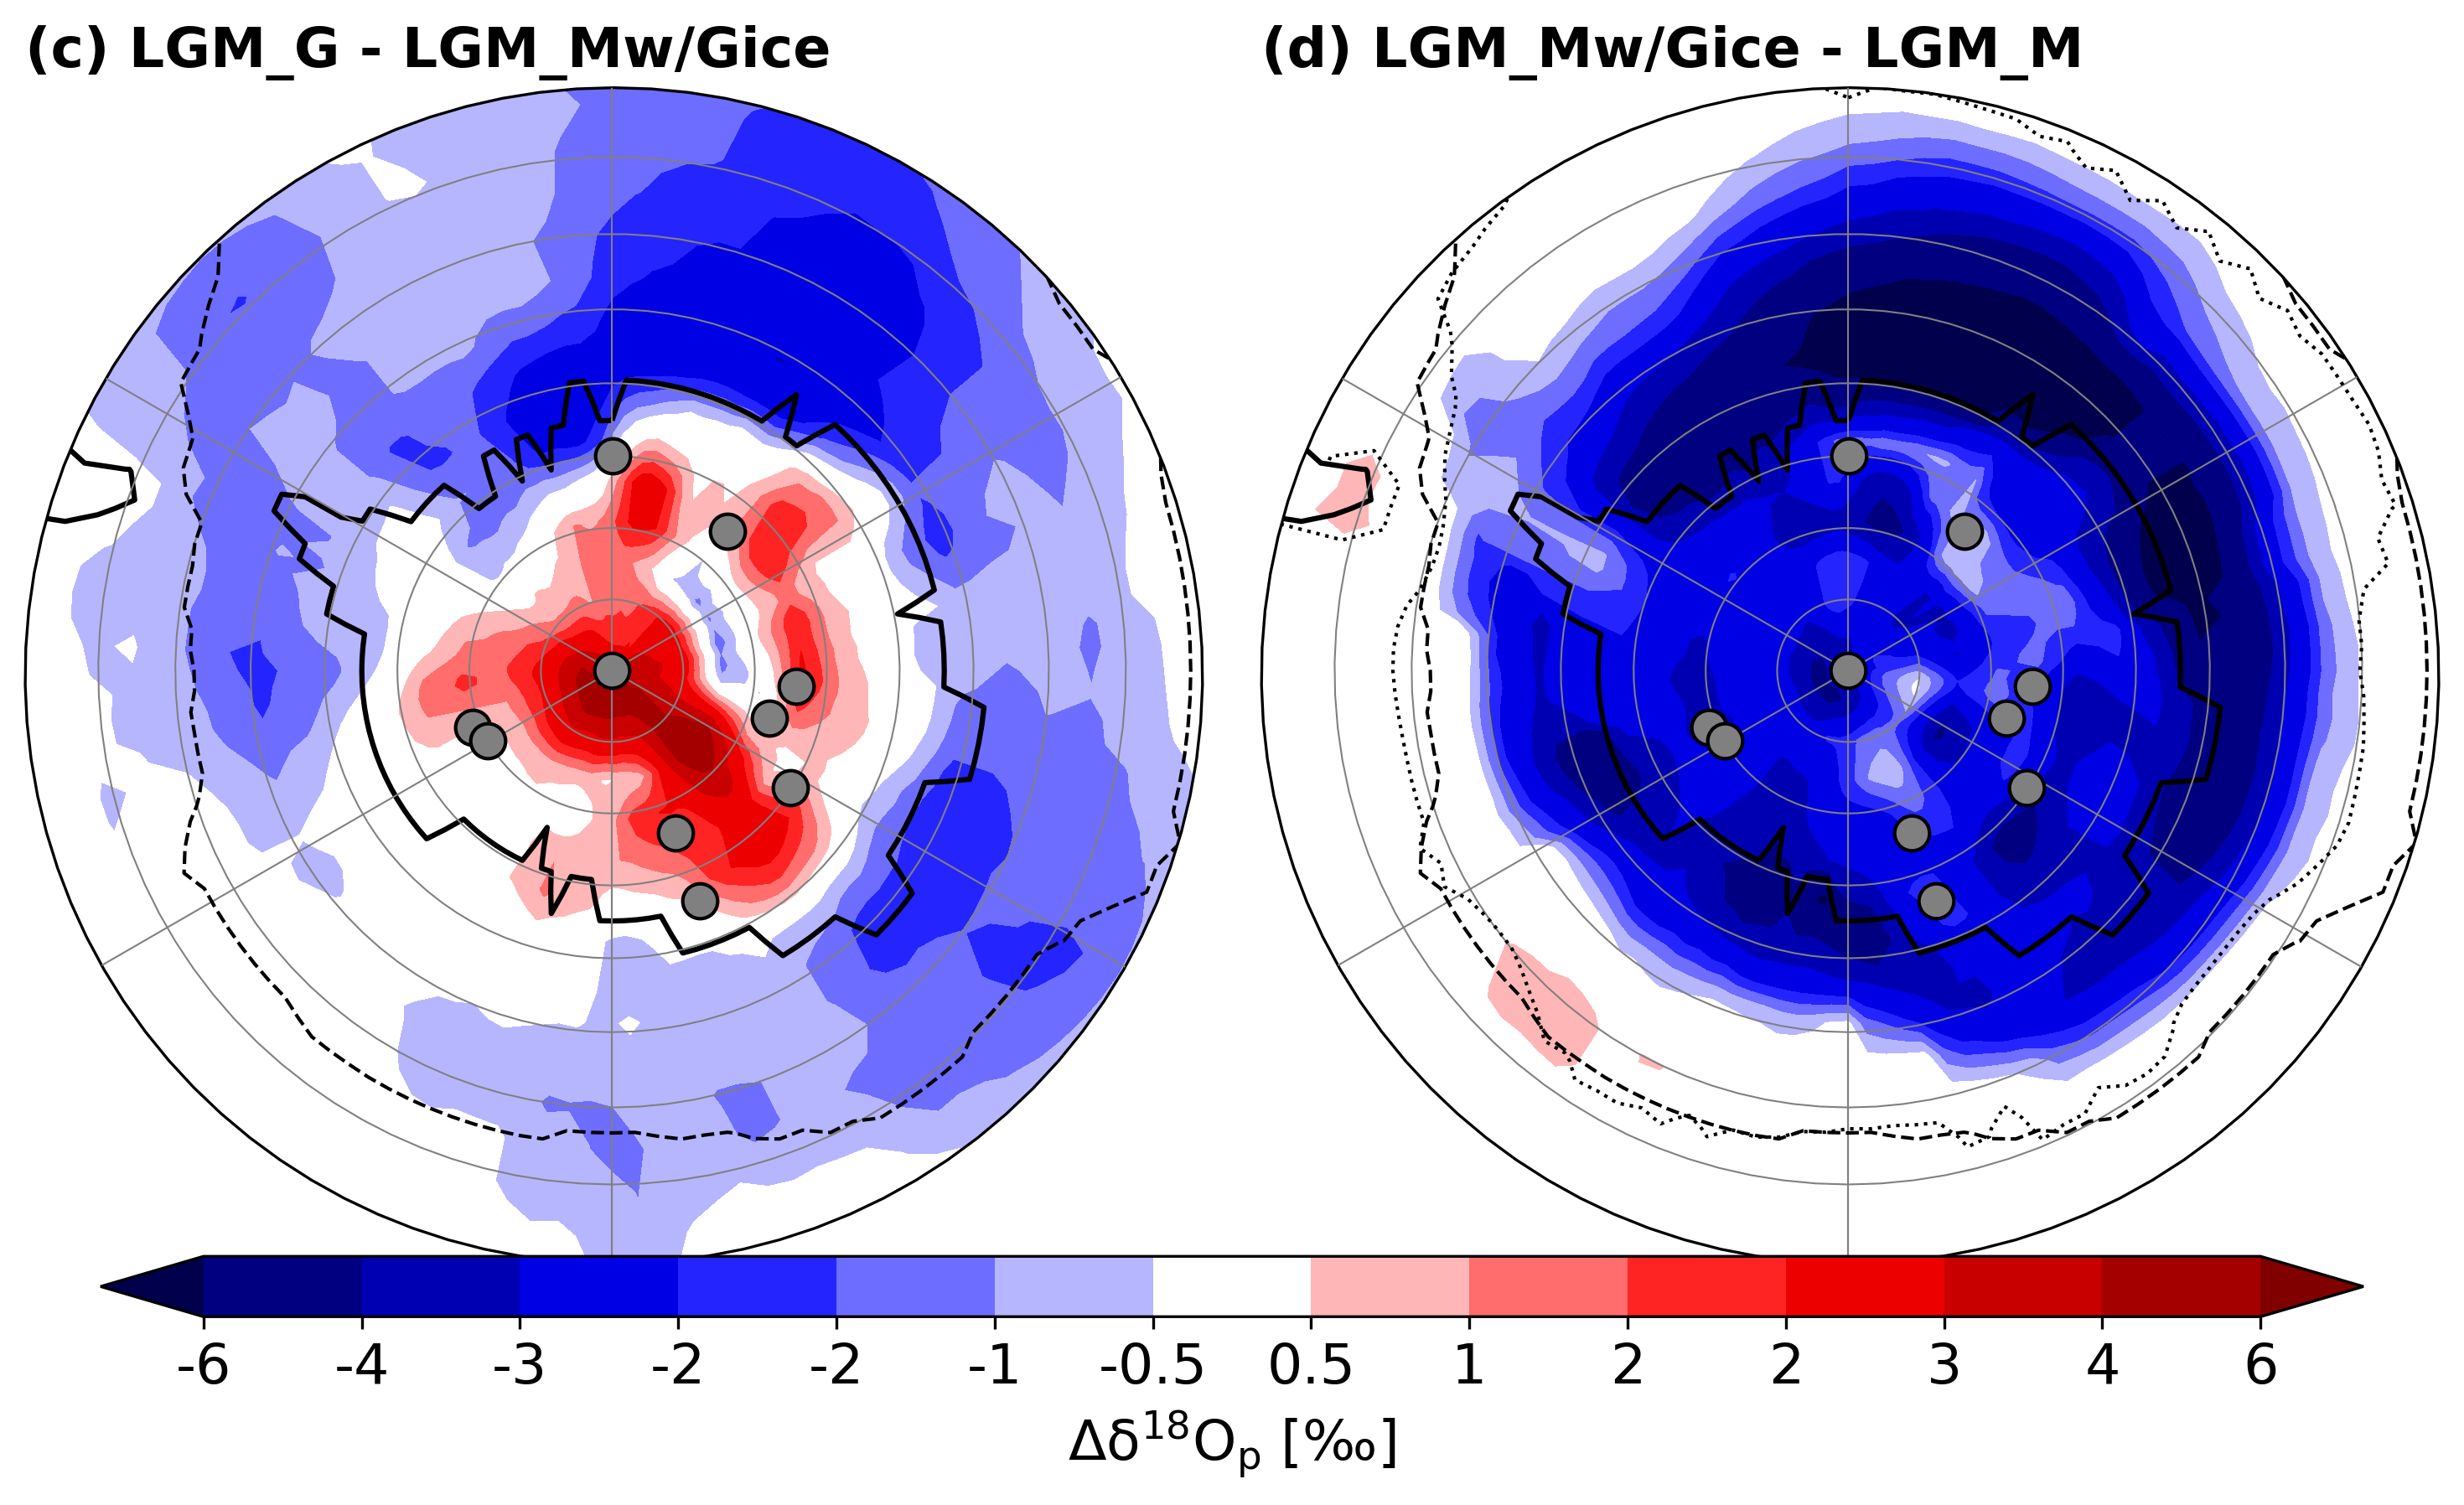

In [39]:
area=[-180,180,-90,-50]
fig,ax,cs1,cs2 = drawAnt_field2(
    prcp_d18O_LGM-prcp_d18O_LGM3, 
    prcp_d18O_LGM3-prcp_d18O_LGM2, 
    label1=d18Ow_label+" "+d18O_unit,
    title1=f"(c) {exp_label_LGM} - {exp_label_LGM3}",
    title2=f"(d) {exp_label_LGM3} - {exp_label_LGM2}",
     levels1= tempa_levels, cmap1=tempa_cmap, norm1=tempa_norm, 
     levels2= tempa_levels, cmap2=tempa_cmap, norm2=tempa_norm, 
 area=area, mask1=False, bar=True, barfontsize=16)


for ii in range(2):
    ax[ii].contour(dlon,dlat , grlndf_LGM, levels=[0.5],
                       colors=["black"], linewidths=1.5, alpha=1, transform=ccrs.PlateCarree(),zorder=100)
    ax[ii].scatter(df_reconst["lon"],df_reconst["lat"], color=(0, 0, 0, 1), 
                   s=100, marker="o", edgecolors="black", facecolor="gray",linewidth=1,
                          transform=ccrs.PlateCarree(), zorder=10000)

# Sea ice
ax[0].contour(dlon,dlat , gricr_LGM, levels=[0.15],  linestyles="dashed",
                       colors=["black"], linewidths=1, alpha=1, transform=ccrs.PlateCarree(),zorder=10000)
ax[1].contour(dlon,dlat , gricr_LGM, levels=[0.15],  linestyles="dashed",
                       colors=["black"], linewidths=1, alpha=1, transform=ccrs.PlateCarree(),zorder=10000)
ax[1].contour(dlon,dlat , gricr_LGM2, levels=[0.15], linestyles="dotted",
                       colors=["black"], linewidths=1, alpha=1, transform=ccrs.PlateCarree(),zorder=10000)


plt.subplots_adjust(top=1,bottom=0.05,left=0.02,right=0.98,hspace=0.05,wspace=0.05)
plt.show()                 

### $\mathsf{\delta^{18}O_{p,a}}$

#### LGMx - LGMy

### $\mathsf{\delta^{18}O_p}$ - $\mathsf{\delta^{18}O_{pa}}$

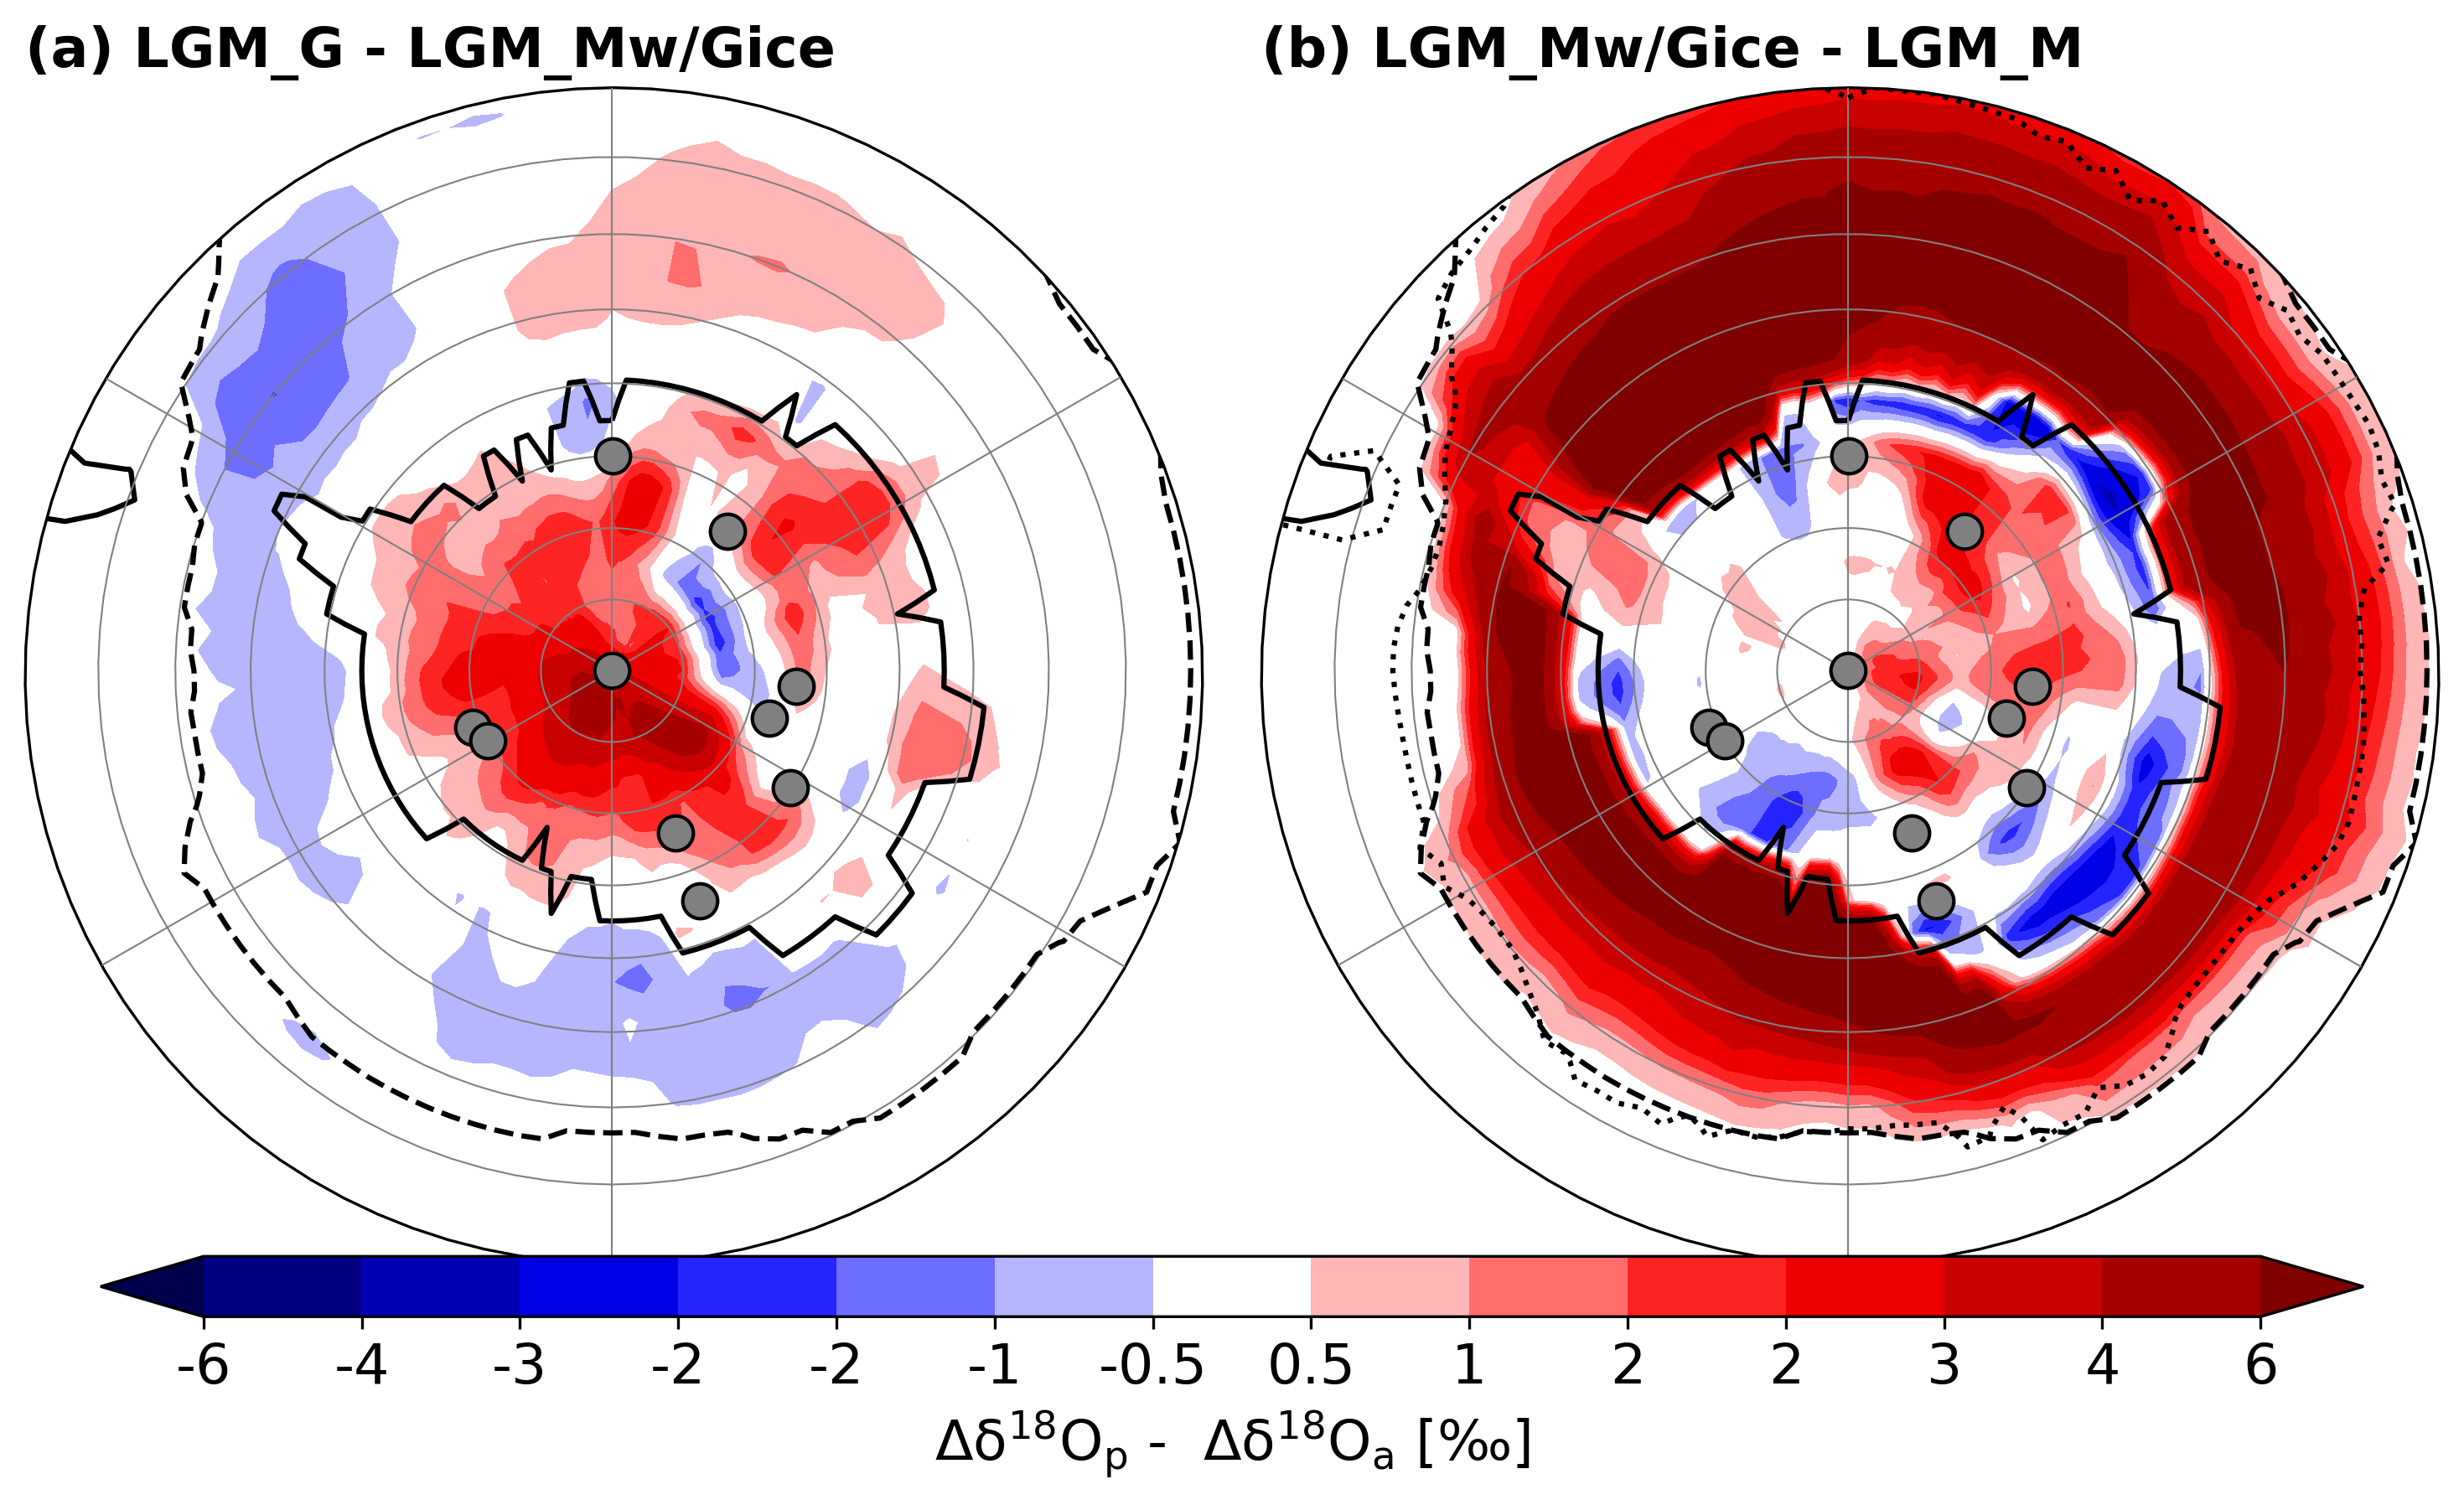

In [40]:
area=[-180,180,-90,-50]
fig,ax,cs1,cs2 = drawAnt_field2(
    (prcp_d18O_LGM-prcp_d18O_LGM3)-(prcp_d18Oa_LGM-prcp_d18Oa_LGM3), 
    (prcp_d18O_LGM3-prcp_d18O_LGM2)-(prcp_d18Oa_LGM3-prcp_d18Oa_LGM2), 
    label1=f"{d18Ow_label} - {d18Oa_label} {d18O_unit}",
    title1=f"(a) {exp_label_LGM} - {exp_label_LGM3}",
    title2=f"(b) {exp_label_LGM3} - {exp_label_LGM2}",
    levels1= tempa_levels, cmap1=tempa_cmap, norm1=tempa_norm, 
    levels2= tempa_levels, cmap2=tempa_cmap,     norm2=tempa_norm, 
 area=area, mask1=False, bar=True)


for ii in range(2):
    ax[ii].contour(dlon,dlat , grlndf_LGM, levels=[0.5],
                       colors=["black"], linewidths=1.5, alpha=1, transform=ccrs.PlateCarree(),zorder=100)
    ax[ii].scatter(df_reconst["lon"],df_reconst["lat"], color=(0, 0, 0, 1), 
                   s=100, marker="o", edgecolors="black", facecolor="gray",linewidth=1,
                          transform=ccrs.PlateCarree(), zorder=10000)


# Sea ice
ax[0].contour(dlon,dlat , gricr_LGM, levels=[0.15],  linestyles="dashed",
                       colors=["black"], linewidths=1.5, alpha=1, transform=ccrs.PlateCarree(),zorder=10000)
ax[1].contour(dlon,dlat , gricr_LGM, levels=[0.15],  linestyles="dashed",
                       colors=["black"], linewidths=1.5, alpha=1, transform=ccrs.PlateCarree(),zorder=10000)
ax[1].contour(dlon,dlat , gricr_LGM2, levels=[0.15], linestyles="dotted",
                       colors=["black"], linewidths=1.5, alpha=1, transform=ccrs.PlateCarree(),zorder=10000)


plt.subplots_adjust(top=1,bottom=0.05,left=0.02,right=0.98,hspace=0.05,wspace=0.05)
plt.show()                 

#### LGMx - LGMy

In [41]:
prcp_dex_levels = [-10,-6,-4,-2,-1,-0.5,0.5,1,2,4,6,10]
prcp_dex_cmapname = "RdBu"
prcp_dex_cmap, prcp_dex_norm = Color_Set(
    prcp_dex_levels, prcp_dex_cmapname)
dex_evapw_label = " $\mathrm{\Delta d-excess_{evap}}$"
dex_unit = "[\u2030]" 

In [42]:
area=[-180,180,-90,-20]
fig,ax,cs1, cs2 = drawAnt_field2(
    evap_dex_LGM-evap_dex_LGM3, 
    evap_dex_LGM3-evap_dex_LGM2,
    label1=dex_evapw_label+" "+dD_unit,
    title1=exp_label_LGM+" - "+exp_label_LGM3,
    title2=exp_label_LGM3+" - " +exp_label_LGM2,      levels1= prcp_dex_levels, cmap1=prcp_dex_cmap, norm1=prcp_dex_norm, 
     levels2= prcp_dex_levels, cmap2=prcp_dex_cmap, norm2=prcp_dex_norm, 
    area=area, mask1=False, bar=True)


for ii in range(2):
    ax[ii].contour(dlon,dlat , grlndf_LGM, levels=[0.5],
                       colors=["black"], linewidths=1.5, alpha=1, transform=ccrs.PlateCarree(),zorder=100)


for ii in range(2):
    ax[ii].scatter(df_reconst["lon"],df_reconst["lat"], color=(0, 0, 0, 1), 
                   s=100, marker="o", edgecolors="black", facecolor="gray",linewidth=1,
                          transform=ccrs.PlateCarree(), zorder=10000)

# Sea ice
ax[0].contour(dlon,dlat , gricr_LGM, levels=[0.15],  linestyles="dashed",
                       colors=["black"], linewidths=1.5, alpha=1, transform=ccrs.PlateCarree(),zorder=10000)
ax[1].contour(dlon,dlat , gricr_LGM, levels=[0.15],  linestyles="dashed",
                       colors=["black"], linewidths=1.5, alpha=1, transform=ccrs.PlateCarree(),zorder=10000)
ax[1].contour(dlon,dlat , gricr_LGM2, levels=[0.15], linestyles="dotted",
                       colors=["black"], linewidths=1.5, alpha=1, transform=ccrs.PlateCarree(),zorder=10000)
plt.subplots_adjust(top=1,bottom=0.05,left=0.02,right=0.98,hspace=0.05,wspace=0.05)
plt.show()                 

NameError: name 'evap_dex_LGM' is not defined

### Precipitation

In [43]:
prcpr_levels2 = [ 80,  84,  88,  92,  95,98,102,105, 108, 112, 116, 120]
#prcpr_levels2 = [ 80,  84,  88,  92,  95,105, 108, 112, 116, 120]

#prcpr_levels2 = [50, 80,  84,  88,  92,  95,98,102,105, 108, 112, 116, 120,150]
color_code           = (get_color_code("BrBG",len(prcpr_levels2)+1)[:]) # Modification
mid                  = (len(color_code)-1)/2 
color_code[int(mid)] = "#ffffff"
prcpr_cmap2, prcpr_norm2 = mc.from_levels_and_colors(prcpr_levels2,color_code,extend="both")   

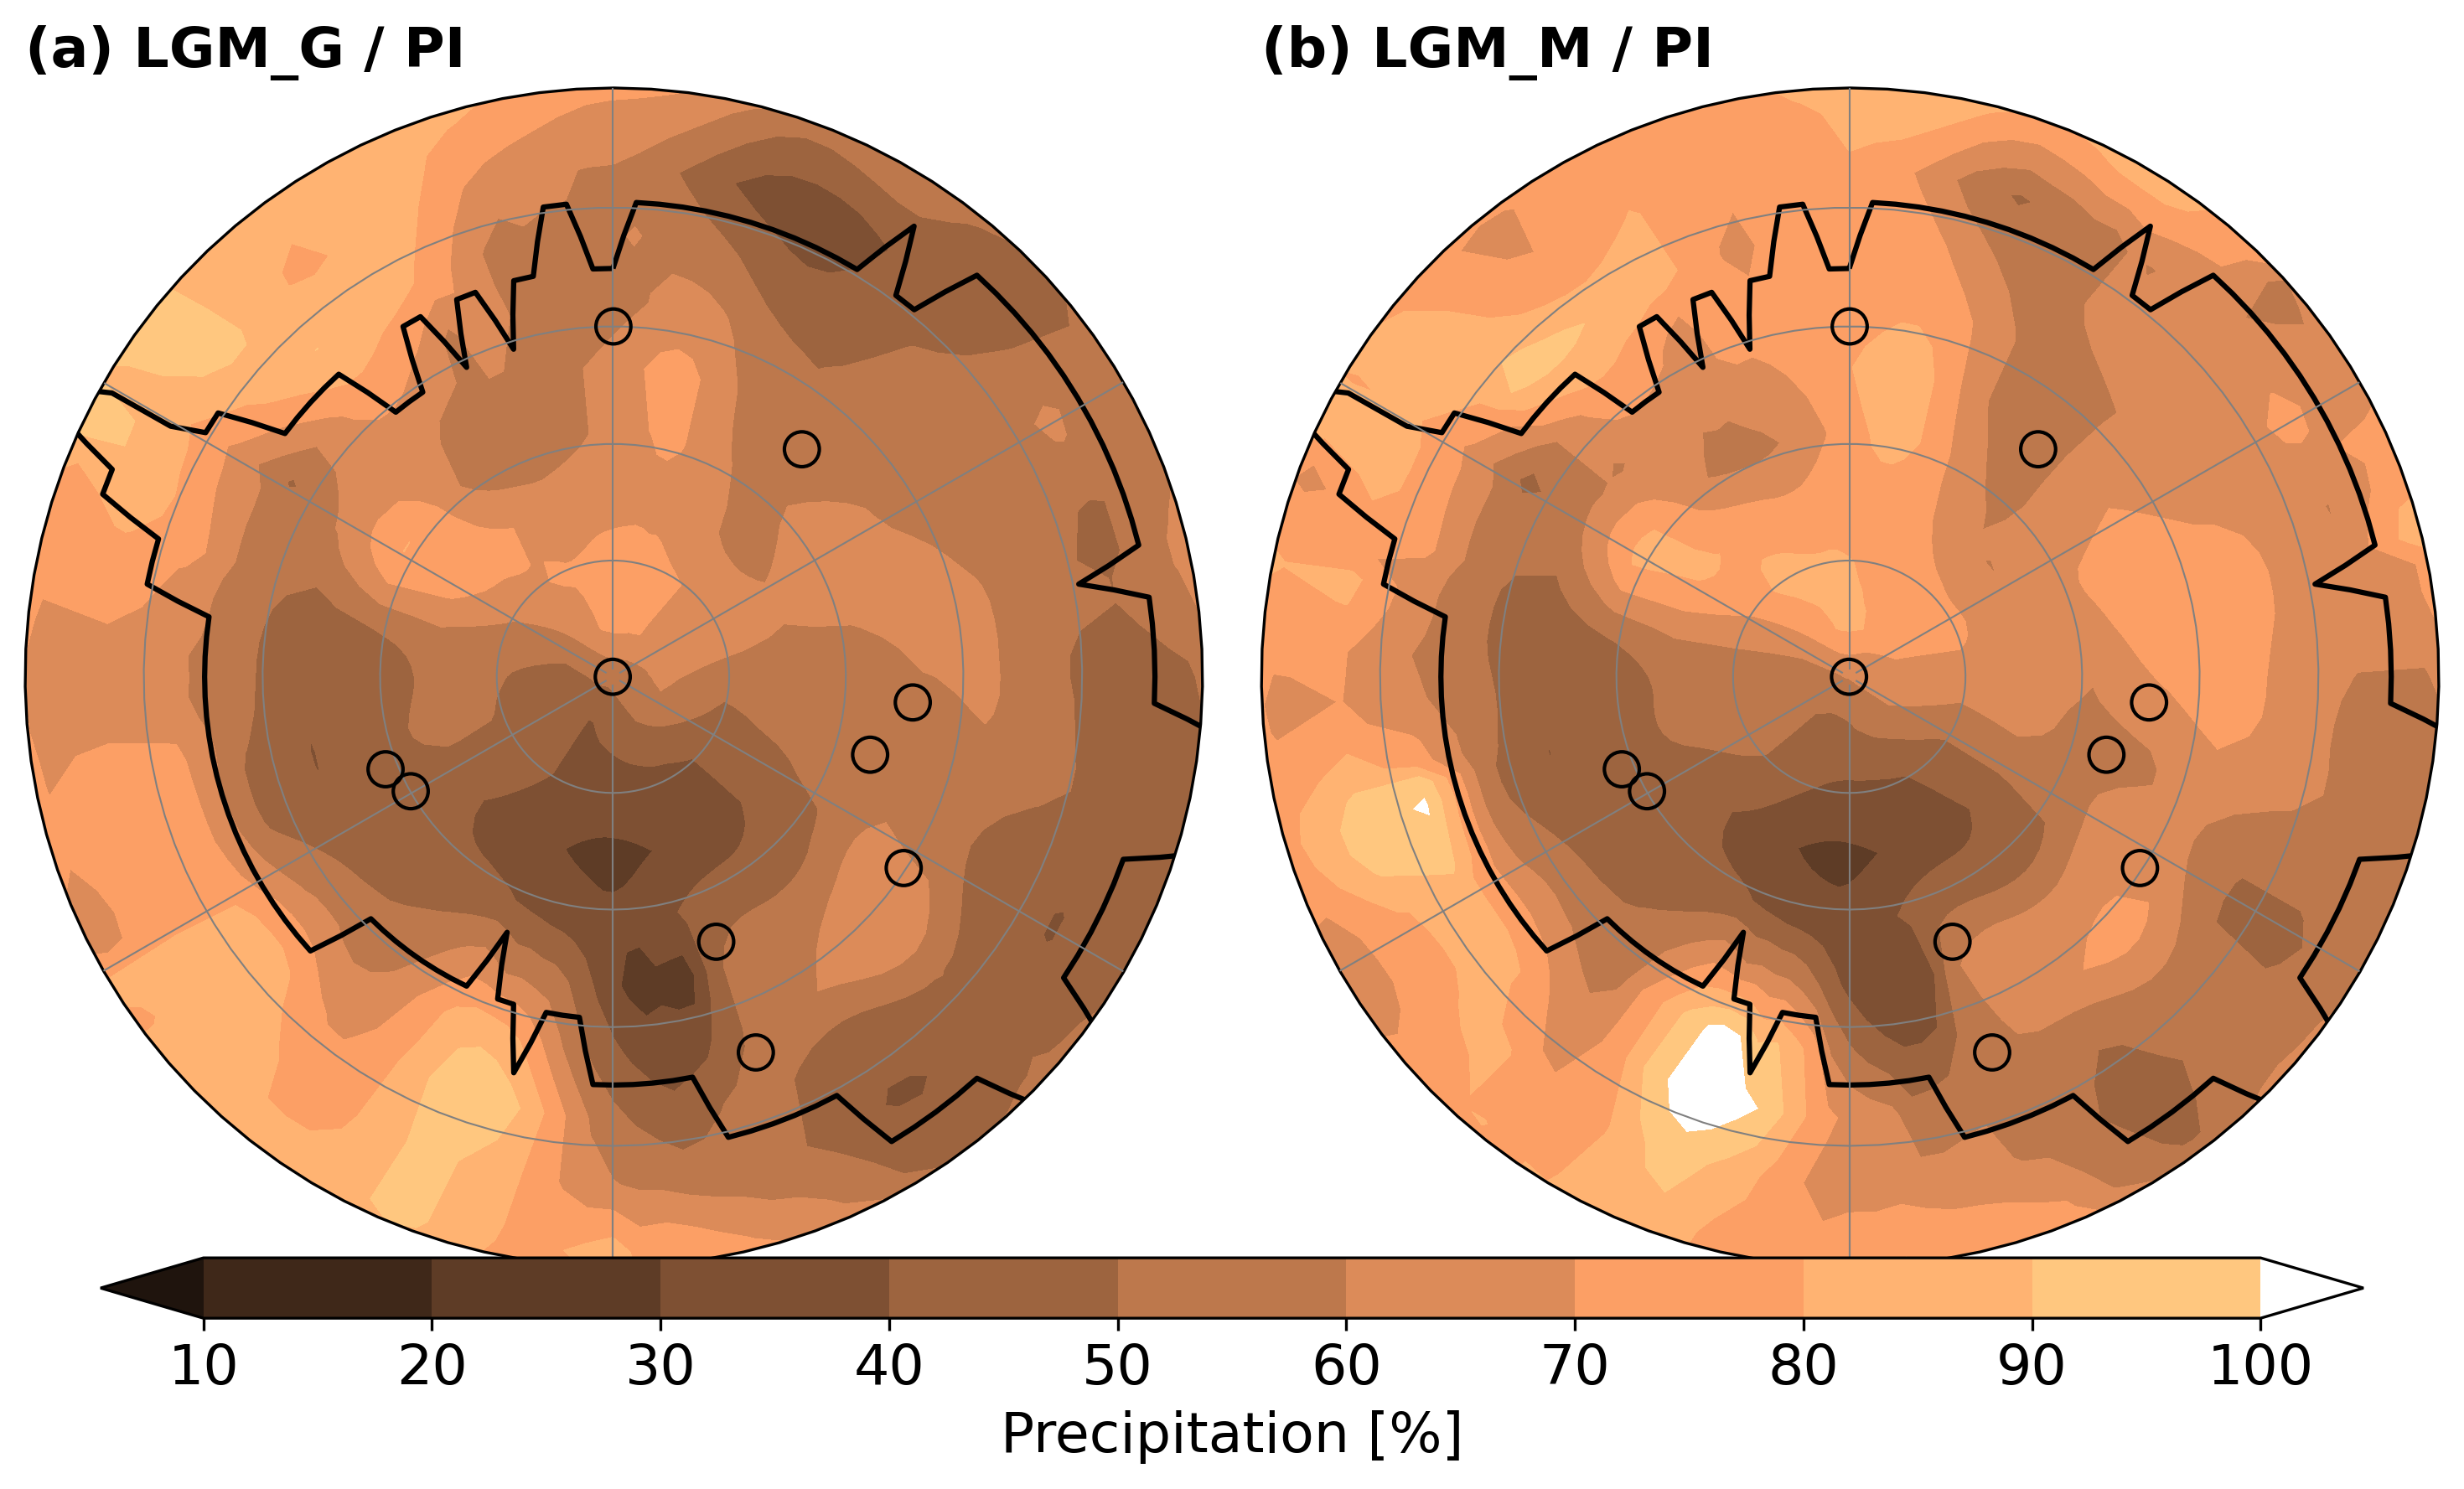

In [44]:
var2= prcp_LGM/prcp_PI*100
var3= prcp_LGM2/prcp_PI*100

area=[-180,180,-90,-65]
fig,ax,cs,cs2 = drawAnt_field2(var2,var3,
     label1="Precipitation "+prcpr_unit,
   levels1= prcpr_levels, cmap1=prcpr_cmap, norm1=prcpr_norm,   
   levels2= prcpr_levels, cmap2=prcpr_cmap, norm2=prcpr_norm,   
    title1=f"(a) "+exp_label_LGM+" / " +exp_label_PI,
    title2=f"(b) "+exp_label_LGM2 + " / " + exp_label_PI,
    area=area,  bar=True,barfontsize=16)


for ii in range(2):
    ax[ii].contour(dlon,dlat , grlndf_LGM, levels=[0.5],
                       colors=["black"], linewidths=1.5, alpha=1, transform=ccrs.PlateCarree(),zorder=100)
    ax[ii].scatter(df_reconst["lon"],df_reconst["lat"], color=(0, 0, 0, 1), 
                   s=100, marker="o", edgecolors="black", facecolor="none",linewidth=1,
                          transform=ccrs.PlateCarree(), zorder=10000)

plt.subplots_adjust(top=1,bottom=0.05,left=0.02,right=0.98,hspace=0.05,wspace=0.05)
plt.show()                 

### Precipitable Water & Zonal wind @250 hPa

In [45]:
prcpr_levels3 = [50, 80,  84,  88,  92,  95,98,102,105, 108, 112, 116, 120,150]
color_code           = (get_color_code("BrBG",len(prcpr_levels3)+1)[:]) # Modification
mid                  = (len(color_code)-1)/2 
color_code[int(mid)] = "#ffffff"
prcpr_cmap3, prcpr_norm3 = mc.from_levels_and_colors(prcpr_levels3,color_code,extend="both")

#### LGMx - LGMy

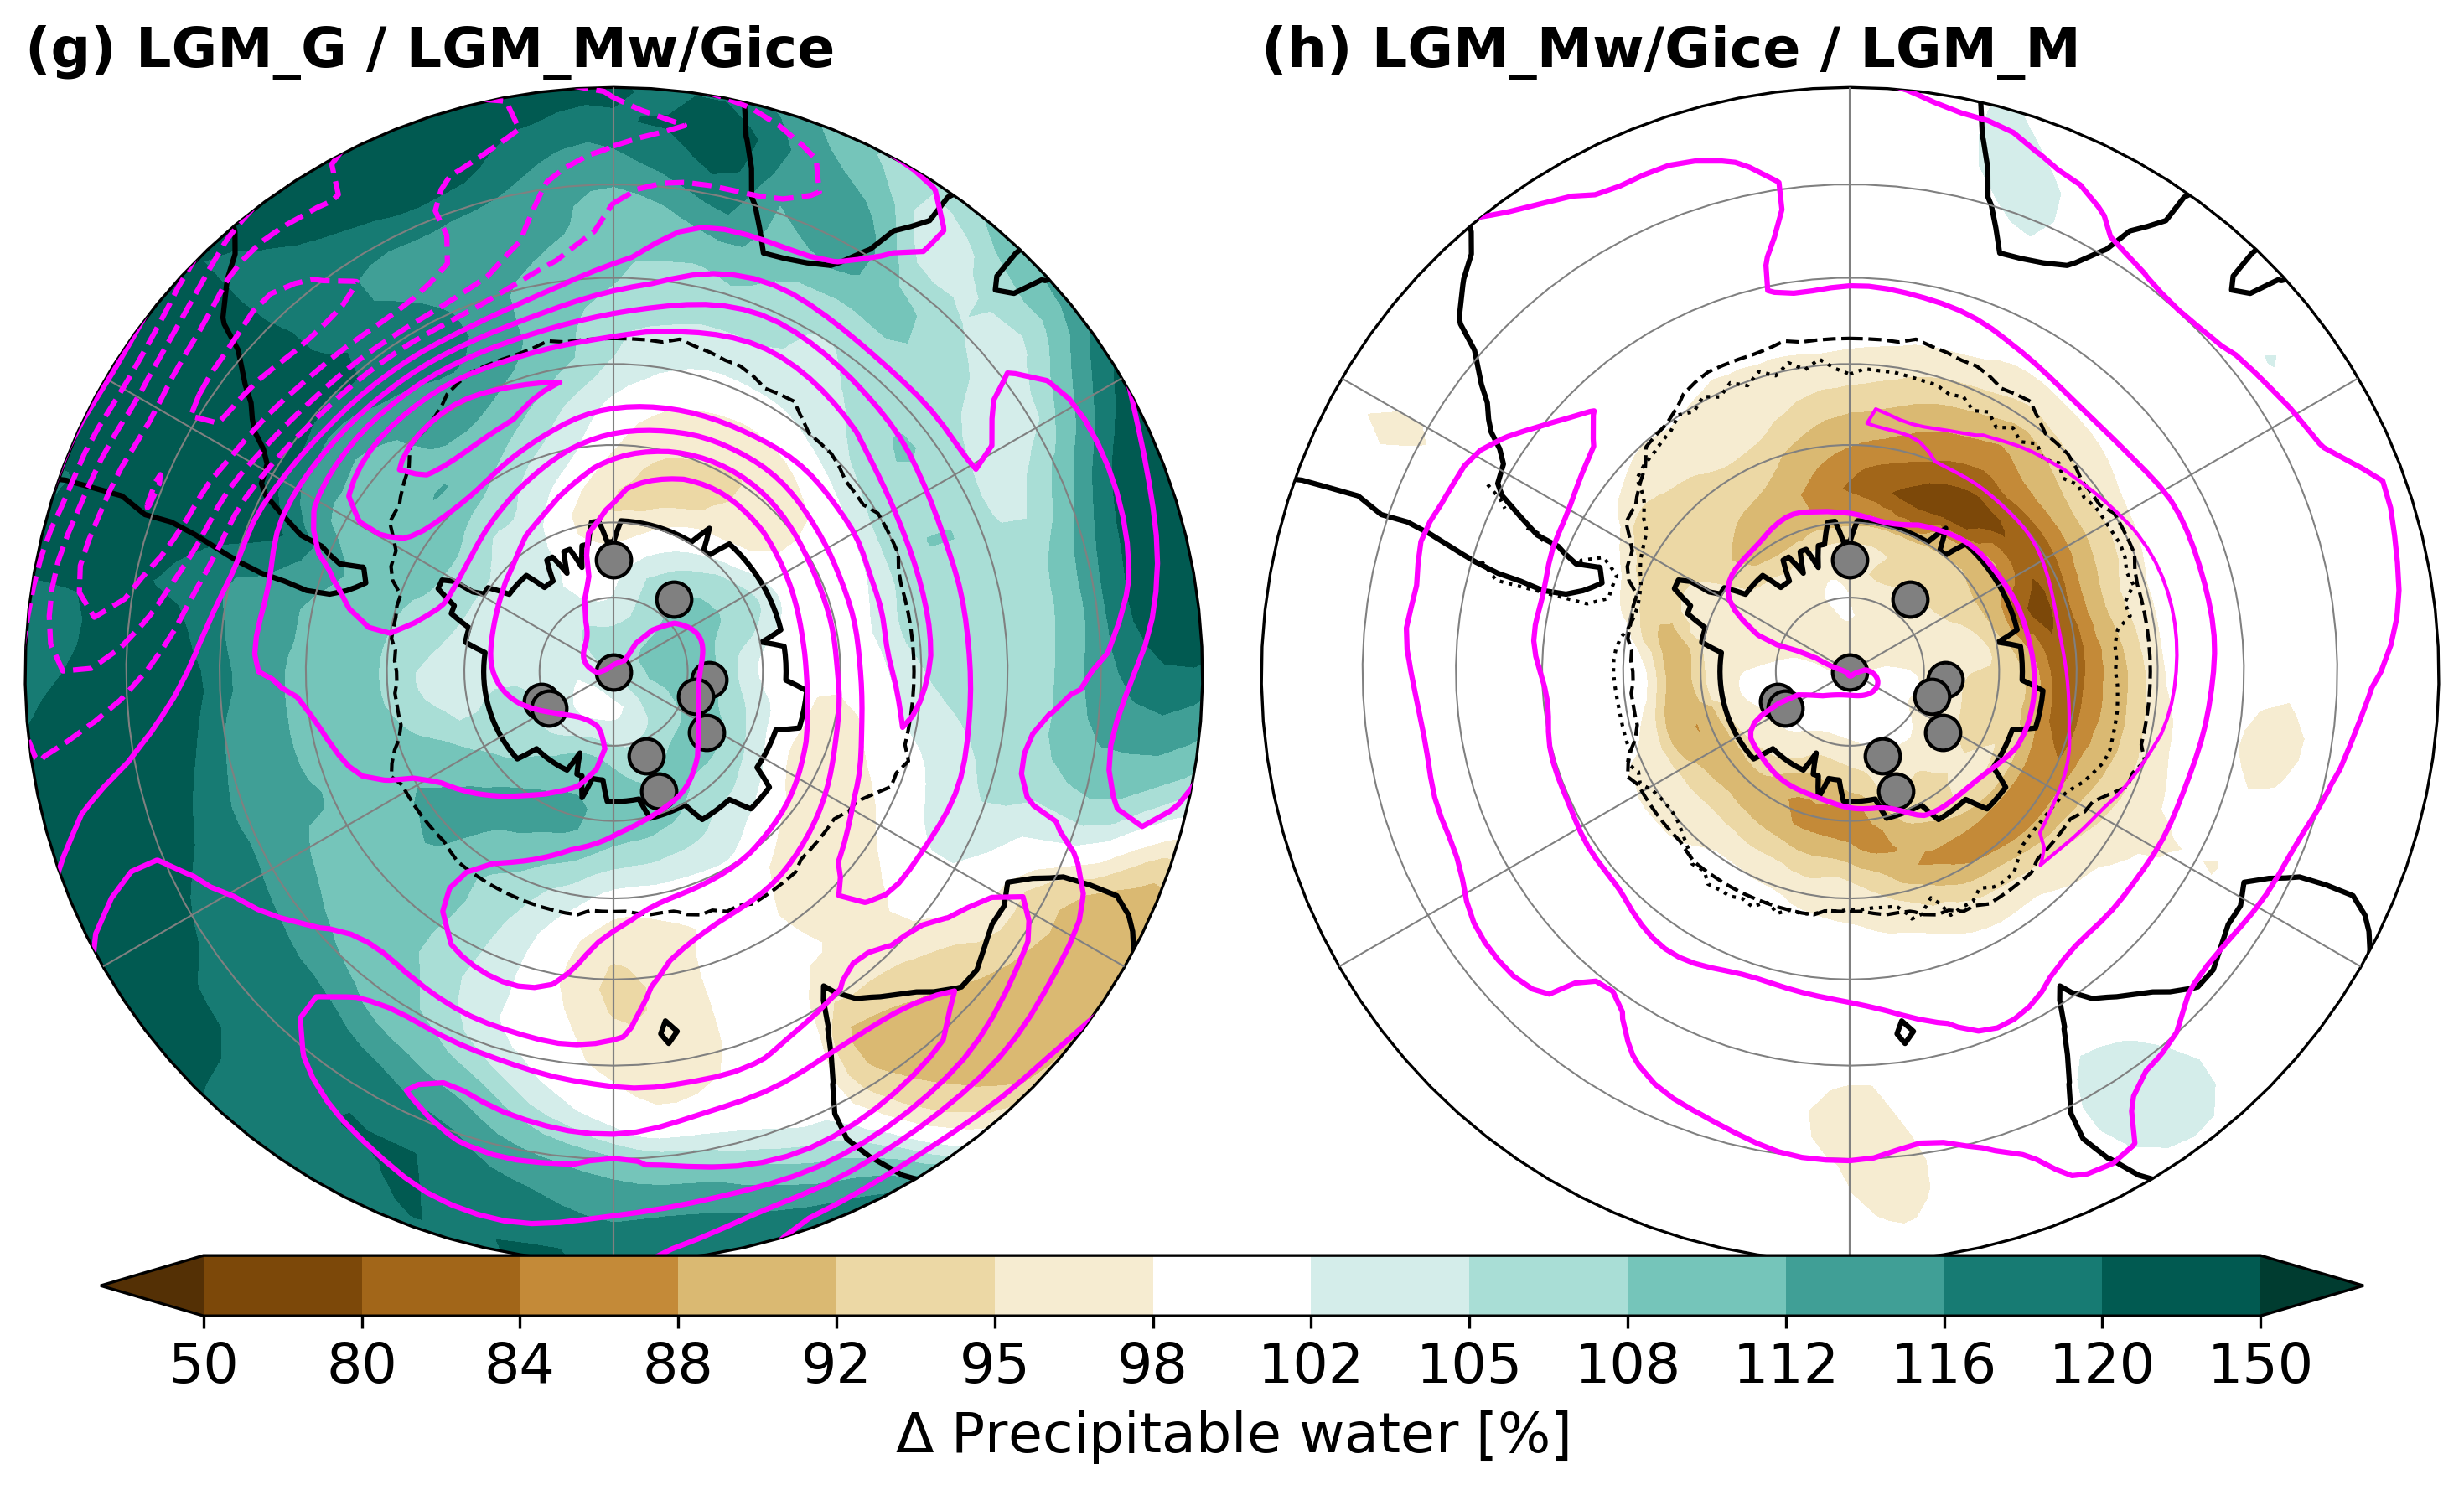

In [46]:
area=[-180,180,-90,-20]
fig,ax,cs1,cs2 = drawAnt_field2(
    precw_LGM/precw_LGM3*100 , 
    precw_LGM3/precw_LGM2*100, 
     label1=precwr_label +" "+precwr_unit,
    levels1= prcpr_levels3, cmap1=prcpr_cmap3, norm1=prcpr_norm3, 
    levels2= prcpr_levels3, cmap2=prcpr_cmap3, norm2=prcpr_norm3, 

    title1=f"(g) {exp_label_LGM} / {exp_label_LGM3}",
    title2=f"(h) {exp_label_LGM3} / {exp_label_LGM2}",

area=area, mask1=False,
    bar=True)

ax[1].contour(dlon,dlat , u250_LGM3-u250_LGM2, 
              levels=np.arange(-40,40,10),  
                       colors=["magenta"], linewidths=1.5, alpha=1, 
                   transform=ccrs.PlateCarree(),zorder=10000000)


ax[0].contour(dlon,dlat , u250_LGM-u250_LGM3, 
              levels=np.arange(-40,40,2),  
               colors=["magenta"], linewidth=1, alpha=1, 
                   transform=ccrs.PlateCarree(),zorder=10000000)
ax[1].contour(dlon,dlat , u250_LGM3-u250_LGM2, 
              levels=np.arange(-40,40,2),  
              colors=["magenta"], linewidths=1, alpha=1, 
                   transform=ccrs.PlateCarree(),zorder=10000000)

for ii in range(2):
    ax[ii].contour(dlon,dlat , grlndf_LGM, levels=[0.5],
                       colors=["black"], linewidths=1.5, alpha=1, transform=ccrs.PlateCarree(),zorder=100)
    ax[ii].scatter(df_reconst["lon"],df_reconst["lat"], color=(0, 0, 0, 1), 
                   s=100, marker="o", edgecolors="black", facecolor="gray",linewidth=1,
                          transform=ccrs.PlateCarree(), zorder=10000)


# Sea ice
ax[0].contour(dlon,dlat , gricr_LGM, levels=[0.15],  linestyles="dashed",
                       colors=["black"], linewidths=1, alpha=1, transform=ccrs.PlateCarree(),zorder=10000)
ax[1].contour(dlon,dlat , gricr_LGM, levels=[0.15],  linestyles="dashed",
                       colors=["black"], linewidths=1, alpha=1, transform=ccrs.PlateCarree(),zorder=10000)
ax[1].contour(dlon,dlat , gricr_LGM2, levels=[0.15], linestyles="dotted",
                       colors=["black"], linewidths=1, alpha=1, transform=ccrs.PlateCarree(),zorder=10000)


plt.subplots_adjust(top=1,bottom=0.05,left=0.02,right=0.98,hspace=0.05,wspace=0.05)
plt.show()                 

### Eady growth rate

In [47]:
evapa_levels = [-3,-2,-1,-0.7,-0.5,-0.3,-0.1,-0.05,0.05,0.1,0.3,0.5,0.7,1,2,3]
evapa_cmapname = "PuOr"
evapa_cmap, evapa_norm = Color_Set(evapa_levels, evapa_cmapname)

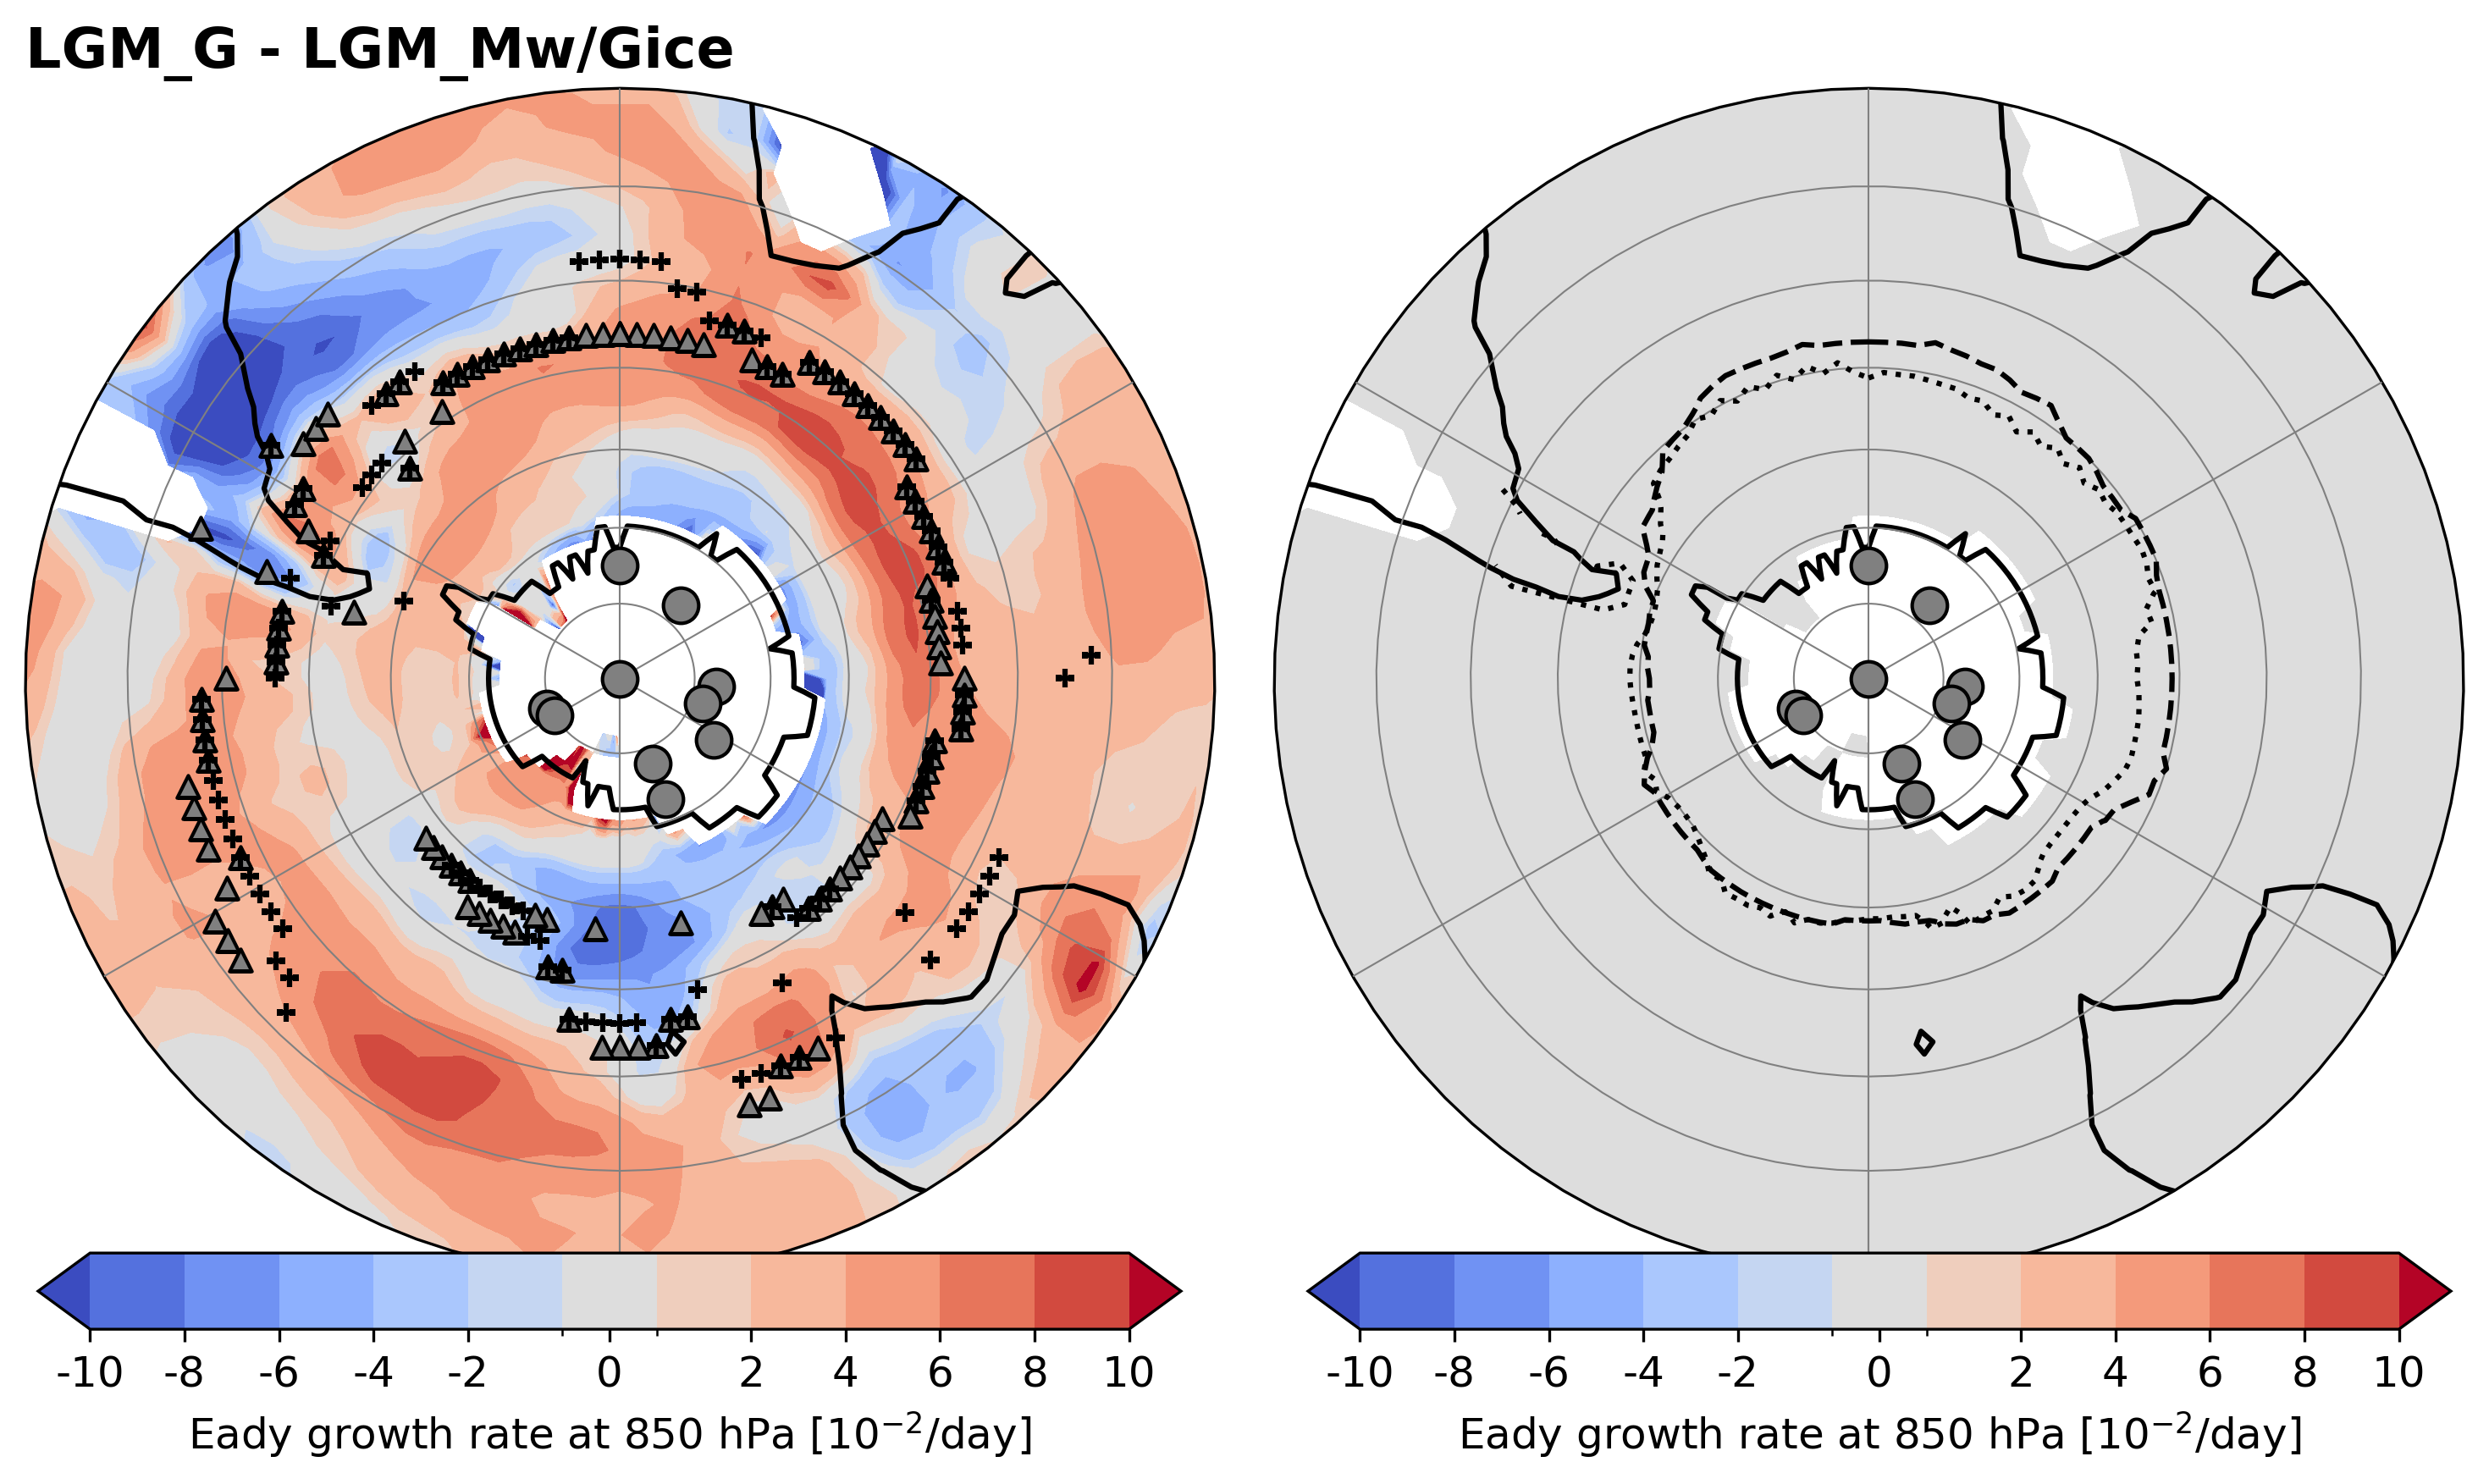

In [48]:
area=[-180,180,-90,-20]
fig,ax,cs1,cs2 = drawAnt_field2(
    (egr_LGM-egr_LGM3)*100,
    (egr_LGM3-egr_LGM2)*100,
    label1="Eady growth rate at 850 hPa [$\mathrm{10^{-2}}$/day]",
    title1=exp_label_LGM+" - "+exp_label_LGM3,
    title2="",
    area=area, mask1=True, bar=False)


for ii in range(2):
    ax[ii].contour(dlon,dlat , grlndf_LGM, levels=[0.5],
                       colors=["black"], linewidths=1.5, alpha=1, transform=ccrs.PlateCarree(),zorder=100)
    ax[ii].scatter(df_reconst["lon"],df_reconst["lat"], color=(0, 0, 0, 1), 
                   s=100, marker="o", edgecolors="black", facecolor="gray",linewidth=1,
                          transform=ccrs.PlateCarree(), zorder=10000)

# front
ax[0].scatter(front_LGM3["lon"],front_LGM3["lat"], s=40,
              marker="^", edgecolors="black", color="gray",
              transform=ccrs.PlateCarree(),zorder=10000000)
ax[0].scatter(front_LGM["lon"],front_LGM["lat"], s=30,
              marker="+", edgecolors="black", color="black",
              transform=ccrs.PlateCarree(),zorder=10000000)

#ax[0].scatter(front_LGM3["lon"],front_LGM3["lat"],color=(0, 0, 0, 1), s=30, marker="o", edgecolors="black", facecolor="purple",linewidth=1, transform=ccrs.PlateCarree(), zorder=10000)
# Sea ice

ax[1].contour(dlon,dlat , gricr_LGM, levels=[0.15],  linestyles="dashed",
                       colors=["black"], linewidths=1.5, alpha=1, transform=ccrs.PlateCarree(),zorder=10000)
ax[1].contour(dlon,dlat , gricr_LGM2, levels=[0.15], linestyles="dotted",
                       colors=["black"], linewidths=1.5, alpha=1, transform=ccrs.PlateCarree(),zorder=10000)

draw_map().label_h(fig,ax,[0.025, 0.1, 0.45, 0.05], cs1, np.arange(-10,12,2), "Eady growth rate at 850 hPa [$\mathrm{10^{-2}}$/day]",12)
draw_map().label_h(fig,ax,[0.525, 0.1, 0.45, 0.05], cs2, np.arange(-10,12,2), "Eady growth rate at 850 hPa [$\mathrm{10^{-2}}$/day]",12)

plt.subplots_adjust(top=1,bottom=0.05,left=0.02,right=0.98,hspace=0.05,wspace=0.05)
plt.show()                 

### Sea Boundary conditions & sea level pressures

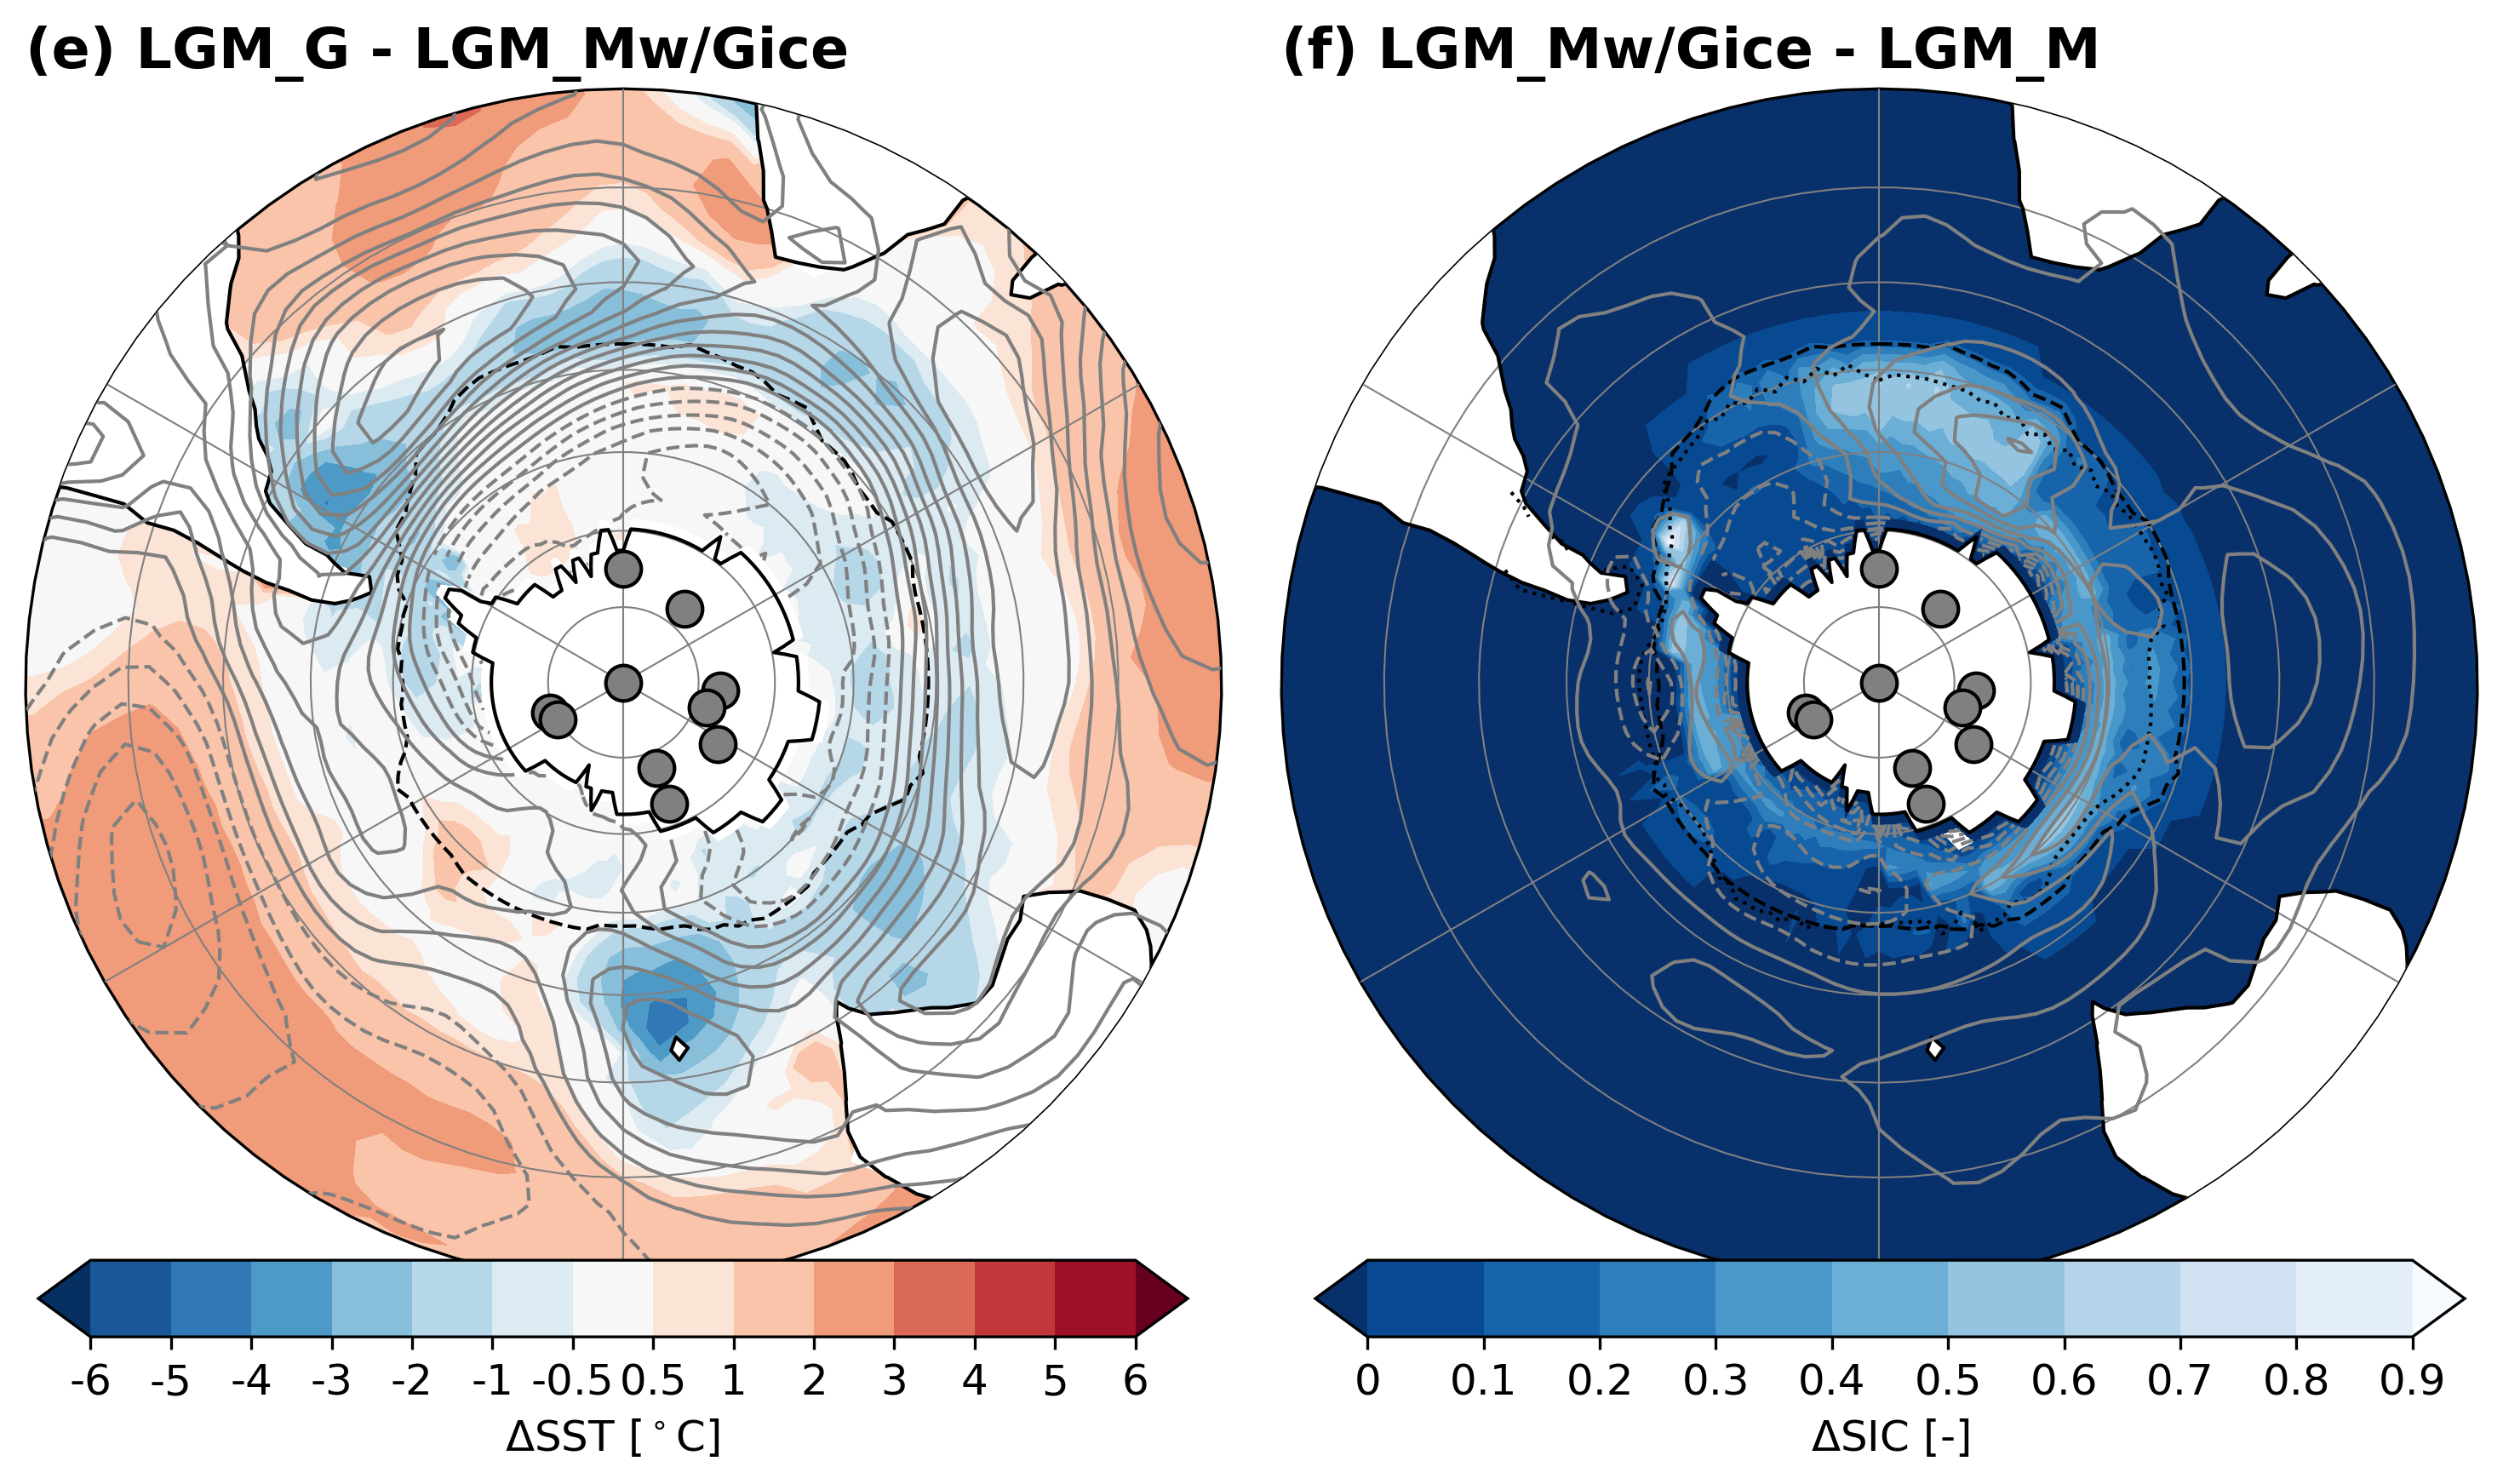

In [49]:
area=[-180,180,-90,-20]
fig,ax,cs1,cs2 = drawAnt_field2(
    (grsst_LGM-grsst_LGM3 ), 
    (gricr_LGM3-gricr_LGM2), 
    title1=f"(e) {exp_label_LGM} - {exp_label_LGM3}",
    title2=f"(f) {exp_label_LGM3} - {exp_label_LGM2}",

    label1="$\mathrm{\Delta}$SST "+ssta_unit,
    levels1=ssta_levels, cmap1=ssta_cmap, norm1=ssta_norm, 
    levels2= ice_levels, cmap2=ice_cmap, norm2=ice_norm, 
    mask1=True, mask2=True,
    area=area, bar=False)
ax[0].contour(dlon,dlat , slp_LGM-slp_LGM3, 
              levels=np.arange(-10,10,0.5),  
                       colors=["gray"], linewidths=1, alpha=1, 
                   transform=ccrs.PlateCarree(),zorder=10000000)

ax[1].contour(dlon,dlat , slp_LGM3-slp_LGM2, 
              levels=np.arange(-10,10,0.5),  
                       colors=["gray"], linewidths=1, alpha=1, 
                   transform=ccrs.PlateCarree(),zorder=10000000)

# Sea ice    
ax[0].contour(dlon,dlat , gricr_LGM, levels=[0.15],  linestyles="dashed",
                       colors=["black"], linewidths=1, alpha=1, 
                   transform=ccrs.PlateCarree(),zorder=10000)
ax[1].contour(dlon,dlat , gricr_LGM, levels=[0.15],  linestyles="dashed",
                       colors=["black"], linewidths=1, alpha=1, 
                   transform=ccrs.PlateCarree(),zorder=10000)
ax[1].contour(dlon,dlat , gricr_LGM2, levels=[0.15],  linestyles="dotted",
                       colors=["black"], linewidths=1, alpha=1, 
                   transform=ccrs.PlateCarree(),zorder=10000)

    
for ii in range(2):    
    ax[ii].contour(dlon,dlat , grlndf_LGM, levels=[0.5],
                       colors=["black"], linewidths=1, alpha=1, 
                   transform=ccrs.PlateCarree(),zorder=10000)
    ax[ii].scatter(df_reconst["lon"],df_reconst["lat"], color=(0, 0, 0, 1), 
                   s=100, marker="o", edgecolors="black", facecolor="gray",linewidth=1,
                          transform=ccrs.PlateCarree(), zorder=1000)

    
draw_map().label_h(fig,ax,[0.025, 0.1, 0.45, 0.05], cs1, ssta_levels, "$\mathrm{\Delta}$SST "+ssta_unit,12)
draw_map().label_h(fig,ax,[0.525, 0.1, 0.45, 0.05], cs2, ice_levels, "$\mathrm{\Delta}$SIC " +ice_unit,12)

plt.subplots_adjust(top=1,bottom=0.05,left=0.02,right=0.98,hspace=0.05,wspace=0.05)
plt.show()                 